# Viewing regional economic dynamics from above using nighttime lights and land cover: Insights from dimly lit islands

## Install Packages

In [1]:
import pandas as pd
# import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandasgui import show

## Preliminaries

In [2]:
# Set path
path = "/Users/Jesson Pagaduan/Google Drive/Geospatial_Project/"

## Regional GDP

In [3]:
df_gdp = pd.read_csv(path + "data/scratch/data_16Apr.csv", index_col=False,
                     usecols=['YEAR', 'REGION', 'ZONE_CODE', 'GDP', 'GDP_AGR', 'GDP_IND', 
                              'GDP_SVC', 'GDPpc'], parse_dates=['YEAR'])
df_gdp.columns = [i.lower() for i in df_gdp.columns]

In [4]:
df_gdp = df_gdp.assign(gdp_non_agr = lambda x: x.gdp_ind + x.gdp_svc,
                       log_gdp = lambda x: np.log(x.gdp),
                       log_gdp_agr = lambda x: np.log(x.gdp_agr),
                       log_gdp_ind = lambda x: np.log(x.gdp_ind),
                       log_gdp_svc = lambda x: np.log(x.gdp_svc),
                       log_gdp_non_agr = lambda x: np.log(x.gdp_non_agr),
                       log_gdppc = lambda x: np.log(x.gdppc))

C:\Users\Jesson Pagaduan\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log



In [5]:
gdp_growth = pd.DataFrame(df_gdp.set_index(['region', 'year']).groupby('zone_code').pct_change() * 100).reset_index()

In [6]:
df_gdp = df_gdp.set_index(['region', 'year']).join(gdp_growth.set_index(['region', 'year']), rsuffix='_gr').reset_index()

In [7]:
df_gdp.drop(columns=['log_gdp_gr', 'log_gdp_agr_gr', 'log_gdp_ind_gr', 'log_gdp_svc_gr', 
                     'log_gdp_non_agr_gr', 'log_gdppc_gr'], inplace=True)

In [8]:
df_gdp_p1 = df_gdp[df_gdp['year'] < '2009-01-01']
df_gdp_p2 = df_gdp[df_gdp['year'] >= '2009-01-01']

### Sample: 2000-2008

#### Regional GDP levels

In [9]:
#  Average GDP per region, highest to lowest
top_ave_gdp_p1 = df_gdp_p1.groupby(['region']).mean().sort_values(by='log_gdp', ascending=False)[['zone_code', 'log_gdp']]
top_ave_gdp_p1

zone_code    log_gdp
region                                                           
Metropolitan Manila                                 13  12.806820
Central Luzon (Region III)                           6  11.518371
Western Visayas (Region VI)                         16  11.325552
Central Visayas (Region VII)                         7  11.313934
Davao Region (Region XI)                             9  10.945464
Northern Mindanao (Region X)                        14  10.892640
SOCCSKSARGEN (Region XII)                           15  10.551836
Ilocos Region (Region I)                            11  10.449840
Bicol Region (Region V)                              2  10.392438
Zamboanga Peninsula (Region IX)                     17  10.325602
Cordillera Administrative Region (CAR)               8  10.207328
Eastern Visayas (Region VIII)                       10  10.156383
Cagayan Valley (Region II)                           4  10.096574
Caraga (Region XIII)                                 5   9.657823
Autonomous Region of Muslim Mindanao (ARMM)          1   9.246430
MIMAROPA (Region IV-B)                              12       -inf
CALABARZON (Region IV-A)                             3       -inf

In [10]:
# Create a heatmap visualizing average GDP

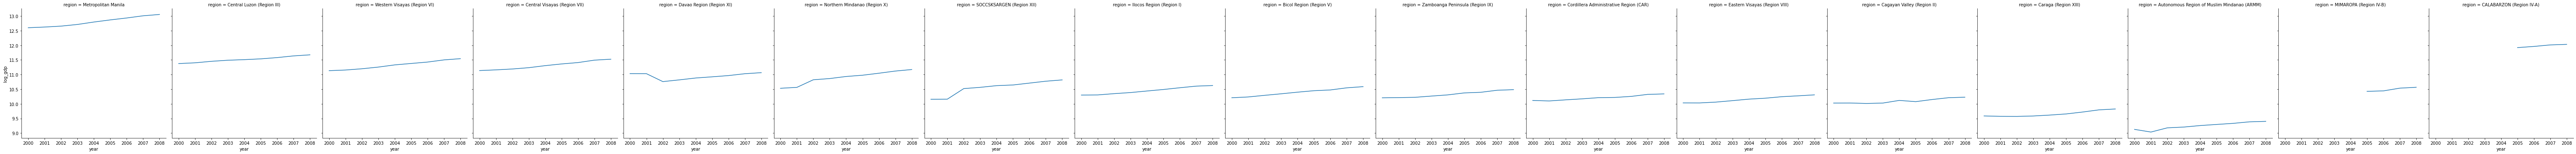

In [11]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp', col='region', kind='line', 
            col_order=top_ave_gdp_p1.index)

In [12]:
#  Average agri GDP per region, highest to lowest
top_ave_gdp_p1_agr = df_gdp_p1.groupby(['region']).mean().sort_values(by='log_gdp_agr', ascending=False)[['zone_code', 'log_gdp_agr']]
top_ave_gdp_p1_agr

zone_code  log_gdp_agr
region                                                             
Central Luzon (Region III)                           6    10.102803
Western Visayas (Region VI)                         16    10.033724
Davao Region (Region XI)                             9     9.701783
Northern Mindanao (Region X)                        14     9.668482
SOCCSKSARGEN (Region XII)                           15     9.659219
Zamboanga Peninsula (Region IX)                     17     9.641434
Ilocos Region (Region I)                            11     9.585821
Cagayan Valley (Region II)                           4     9.423833
Bicol Region (Region V)                              2     9.279167
Central Visayas (Region VII)                         7     9.169834
Eastern Visayas (Region VIII)                       10     9.046832
Autonomous Region of Muslim Mindanao (ARMM)          1     8.718863
Caraga (Region XIII)                                 5     8.658336
Cordillera Administrative Region (CAR)               8     8.186798
CALABARZON (Region IV-A)                             3          NaN
MIMAROPA (Region IV-B)                              12          NaN
Metropolitan Manila                                 13          NaN

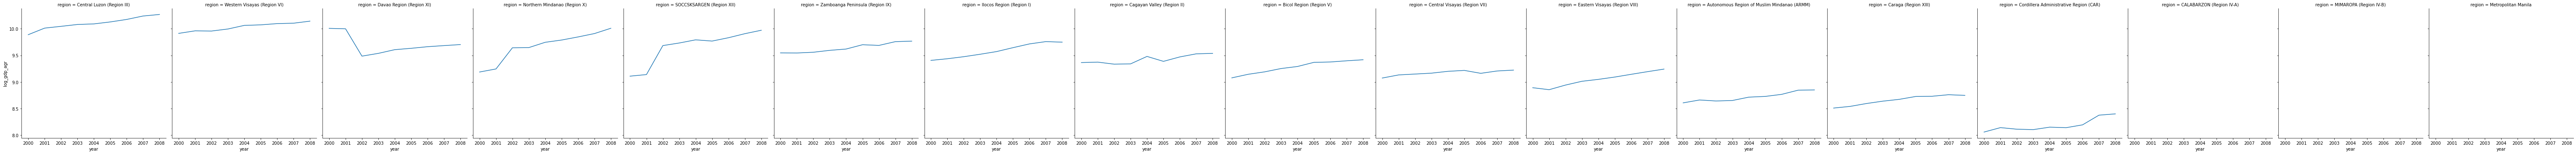

In [13]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_agr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp_agr', col='region', kind='line', 
            col_order=top_ave_gdp_p1_agr.index)

In [14]:
#  Average industry GDP per region, highest to lowest
top_ave_gdp_p1_ind = df_gdp_p1.groupby(['region']).mean().sort_values(by='log_gdp_ind', ascending=False)[['zone_code', 'log_gdp_ind']]
top_ave_gdp_p1_ind

zone_code  log_gdp_ind
region                                                             
Metropolitan Manila                                 13    11.781792
Central Luzon (Region III)                           6    10.542100
Central Visayas (Region VII)                         7    10.127802
Western Visayas (Region VI)                         16     9.972479
Cordillera Administrative Region (CAR)               8     9.759930
Davao Region (Region XI)                             9     9.756642
Northern Mindanao (Region X)                        14     9.737584
SOCCSKSARGEN (Region XII)                           15     9.408918
Eastern Visayas (Region VIII)                       10     8.995578
Bicol Region (Region V)                              2     8.935324
Ilocos Region (Region I)                            11     8.544763
Zamboanga Peninsula (Region IX)                     17     8.476255
Caraga (Region XIII)                                 5     8.391319
Cagayan Valley (Region II)                           4     8.268172
Autonomous Region of Muslim Mindanao (ARMM)          1     7.096640
CALABARZON (Region IV-A)                             3          NaN
MIMAROPA (Region IV-B)                              12          NaN

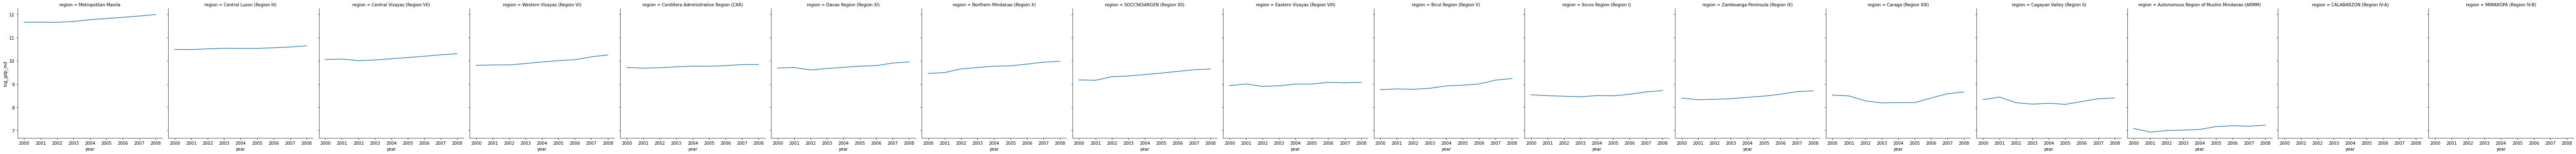

In [15]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_ind.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp_ind', col='region', kind='line', 
            col_order=top_ave_gdp_p1_ind.index)

In [16]:
#  Average service GDP per region, highest to lowest
top_ave_gdp_p1_svc = df_gdp_p1.groupby(['region']).mean().sort_values(by='log_gdp_svc', ascending=False)[['zone_code', 'log_gdp_svc']]
top_ave_gdp_p1_svc

zone_code  log_gdp_svc
region                                                             
Metropolitan Manila                                 13    12.362901
Central Visayas (Region VII)                         7    10.765749
Western Visayas (Region VI)                         16    10.564598
Central Luzon (Region III)                           6    10.553715
Davao Region (Region XI)                             9    10.043401
Northern Mindanao (Region X)                        14     9.955530
Ilocos Region (Region I)                            11     9.608164
Bicol Region (Region V)                              2     9.571963
SOCCSKSARGEN (Region XII)                           15     9.244536
Zamboanga Peninsula (Region IX)                     17     9.236502
Eastern Visayas (Region VIII)                       10     9.122894
Cagayan Valley (Region II)                           4     8.990687
Cordillera Administrative Region (CAR)               8     8.733973
Caraga (Region XIII)                                 5     8.604089
Autonomous Region of Muslim Mindanao (ARMM)          1     8.062864
CALABARZON (Region IV-A)                             3          NaN
MIMAROPA (Region IV-B)                              12          NaN

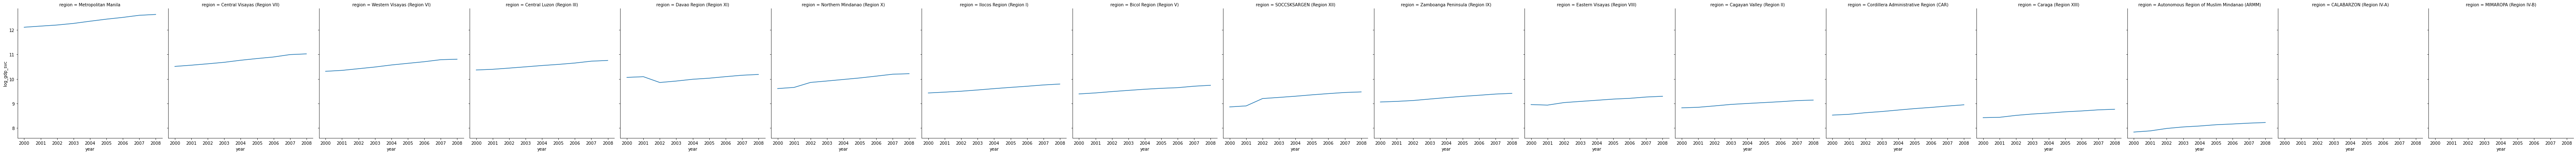

In [17]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_svc.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp_svc', col='region', kind='line', 
            col_order=top_ave_gdp_p1_svc.index)

In [18]:
#  Average non-agri GDP per region, highest to lowest
top_ave_gdp_p1_non_agr = df_gdp_p1.groupby(['region']).mean().sort_values(by='log_gdp_non_agr', ascending=False)[['zone_code', 'log_gdp_non_agr']]
top_ave_gdp_p1_non_agr

zone_code  log_gdp_non_agr
region                                                                 
Metropolitan Manila                                 13        12.807656
Central Luzon (Region III)                           6        11.242046
Central Visayas (Region VII)                         7        11.190955
Western Visayas (Region VI)                         16        11.005145
Davao Region (Region XI)                             9        10.603743
Northern Mindanao (Region X)                        14        10.545806
Cordillera Administrative Region (CAR)               8        10.067059
SOCCSKSARGEN (Region XII)                           15        10.023861
Bicol Region (Region V)                              2         9.997141
Ilocos Region (Region I)                            11         9.905422
Eastern Visayas (Region VIII)                       10         9.755371
Zamboanga Peninsula (Region IX)                     17         9.620372
Cagayan Valley (Region II)                           4         9.389236
Caraga (Region XIII)                                 5         9.200917
Autonomous Region of Muslim Mindanao (ARMM)          1         8.385985
CALABARZON (Region IV-A)                             3              NaN
MIMAROPA (Region IV-B)                              12              NaN

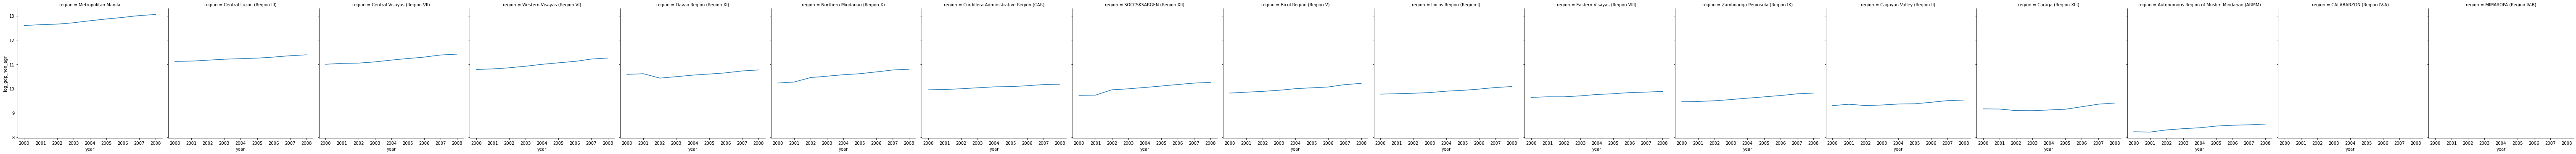

In [19]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_non_agr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp_non_agr', col='region', kind='line', 
            col_order=top_ave_gdp_p1_non_agr.index)

In [20]:
#  Average per capita GDP per region, highest to lowest
top_ave_gdppc_p1 = df_gdp_p1.groupby(['region']).mean().sort_values(by='log_gdppc', ascending=False)[['zone_code', 'log_gdppc']]
top_ave_gdppc_p1

zone_code  log_gdppc
region                                                           
Metropolitan Manila                                 13  10.442957
Cordillera Administrative Region (CAR)               8   9.807826
CALABARZON (Region IV-A)                             3   9.582601
Northern Mindanao (Region X)                        14   9.575512
Davao Region (Region XI)                             9   9.531737
Central Visayas (Region VII)                         7   9.485659
MIMAROPA (Region IV-B)                              12   9.479162
Western Visayas (Region VI)                         16   9.419679
Central Luzon (Region III)                           6   9.323460
SOCCSKSARGEN (Region XII)                           15   9.305343
Zamboanga Peninsula (Region IX)                     17   9.188032
Cagayan Valley (Region II)                           4   8.987883
Ilocos Region (Region I)                            11   8.929205
Caraga (Region XIII)                                 5   8.837878
Eastern Visayas (Region VIII)                       10   8.787727
Bicol Region (Region V)                              2   8.767420
Autonomous Region of Muslim Mindanao (ARMM)          1   8.132652

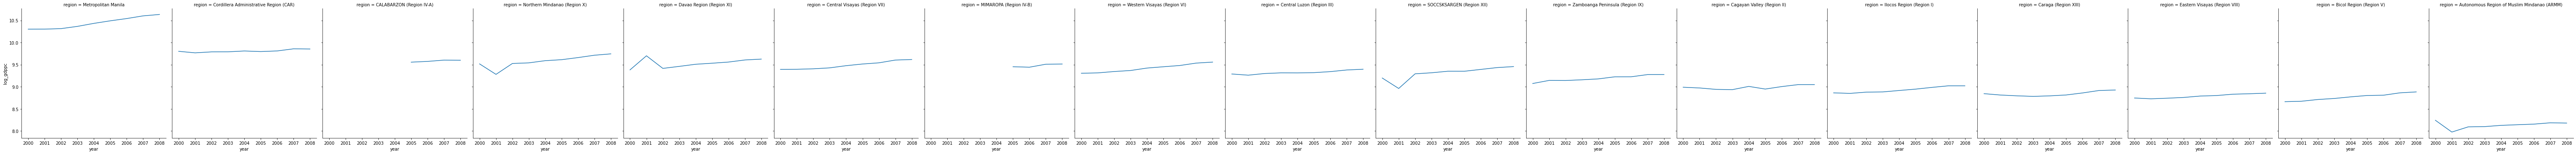

In [21]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdppc_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdppc', col='region', kind='line', 
            col_order=top_ave_gdppc_p1.index)

#### Regional GDP growth

In [22]:
#  Average GDP growth per region, highest to lowest
top_ave_gdp_p1_gr = df_gdp_p1.groupby(['region']).mean().sort_values(by='gdp_gr', ascending=False)[['zone_code', 'gdp_gr']]
top_ave_gdp_p1_gr

zone_code    gdp_gr
region                                                          
MIMAROPA (Region IV-B)                              12       inf
CALABARZON (Region IV-A)                             3       inf
SOCCSKSARGEN (Region XII)                           15  9.285572
Northern Mindanao (Region X)                        14  8.611107
Metropolitan Manila                                 13  5.851850
Western Visayas (Region VI)                         16  5.271000
Central Visayas (Region VII)                         7  4.989557
Bicol Region (Region V)                              2  4.870073
Ilocos Region (Region I)                            11  4.166422
Central Luzon (Region III)                           6  3.815324
Autonomous Region of Muslim Mindanao (ARMM)          1  3.668863
Zamboanga Peninsula (Region IX)                     17  3.571828
Eastern Visayas (Region VIII)                       10  3.508435
Caraga (Region XIII)                                 5  3.051689
Cordillera Administrative Region (CAR)               8  2.861107
Cagayan Valley (Region II)                           4  2.632827
Davao Region (Region XI)                             9  0.933643

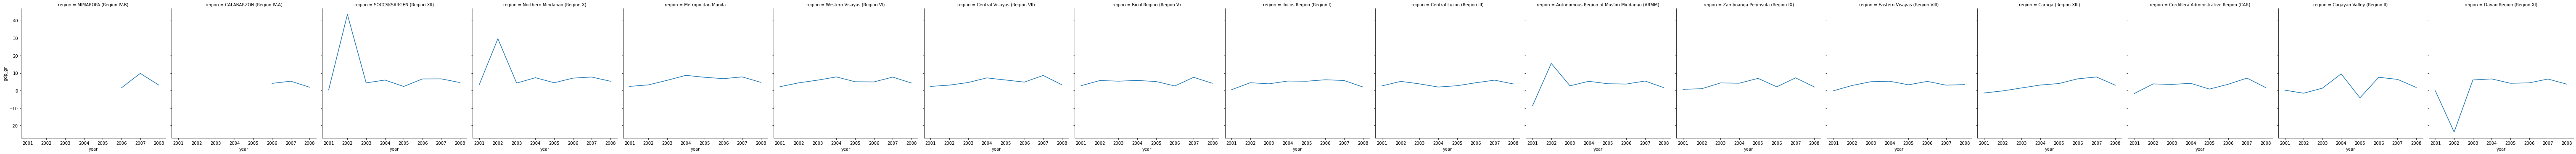

In [23]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p1_gr.index)

In [24]:
#  Average agri GDP growth per region, highest to lowest
top_ave_gdp_p1_agr_gr = df_gdp_p1.groupby(['region']).mean().sort_values(by='gdp_agr_gr', ascending=False)[['zone_code', 'gdp_agr_gr']]
top_ave_gdp_p1_agr_gr

zone_code  gdp_agr_gr
region                                                            
SOCCSKSARGEN (Region XII)                           15   13.157696
Northern Mindanao (Region X)                        14   11.615677
Central Luzon (Region III)                           6    4.921657
Cordillera Administrative Region (CAR)               8    4.574782
Eastern Visayas (Region VIII)                       10    4.526498
Ilocos Region (Region I)                            11    4.406646
Bicol Region (Region V)                              2    4.372518
Autonomous Region of Muslim Mindanao (ARMM)          1    3.138869
Caraga (Region XIII)                                 5    3.047354
Western Visayas (Region VI)                         16    2.939087
Zamboanga Peninsula (Region IX)                     17    2.847187
Cagayan Valley (Region II)                           4    2.410392
Central Visayas (Region VII)                         7    1.931332
Davao Region (Region XI)                             9   -2.343063
CALABARZON (Region IV-A)                             3         NaN
MIMAROPA (Region IV-B)                              12         NaN
Metropolitan Manila                                 13         NaN

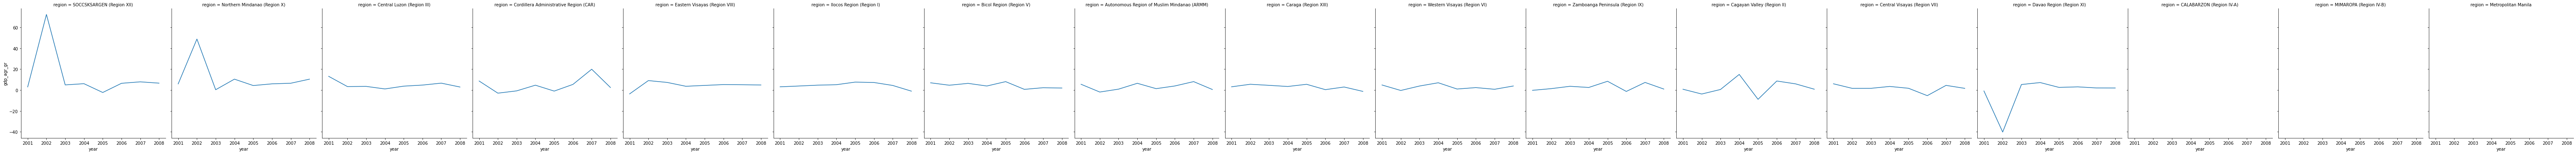

In [25]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_agr_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_agr_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p1_agr_gr.index)

In [26]:
#  Average industry GDP growth per region, highest to lowest
top_ave_gdp_p1_ind_gr = df_gdp_p1.groupby(['region']).mean().sort_values(by='gdp_ind_gr', ascending=False)[['zone_code', 'gdp_ind_gr']]
top_ave_gdp_p1_ind_gr

zone_code  gdp_ind_gr
region                                                            
Northern Mindanao (Region X)                        14    6.826427
Bicol Region (Region V)                              2    6.287897
SOCCSKSARGEN (Region XII)                           15    6.165143
Western Visayas (Region VI)                         16    5.830234
Metropolitan Manila                                 13    4.342946
Zamboanga Peninsula (Region IX)                     17    4.067330
Davao Region (Region XI)                             9    3.527929
Central Visayas (Region VII)                         7    3.288532
Caraga (Region XIII)                                 5    2.487342
Ilocos Region (Region I)                            11    2.370525
Autonomous Region of Muslim Mindanao (ARMM)          1    2.131712
Central Luzon (Region III)                           6    2.023090
Eastern Visayas (Region VIII)                       10    1.933248
Cordillera Administrative Region (CAR)               8    1.649326
Cagayan Valley (Region II)                           4    1.522541
CALABARZON (Region IV-A)                             3         NaN
MIMAROPA (Region IV-B)                              12         NaN

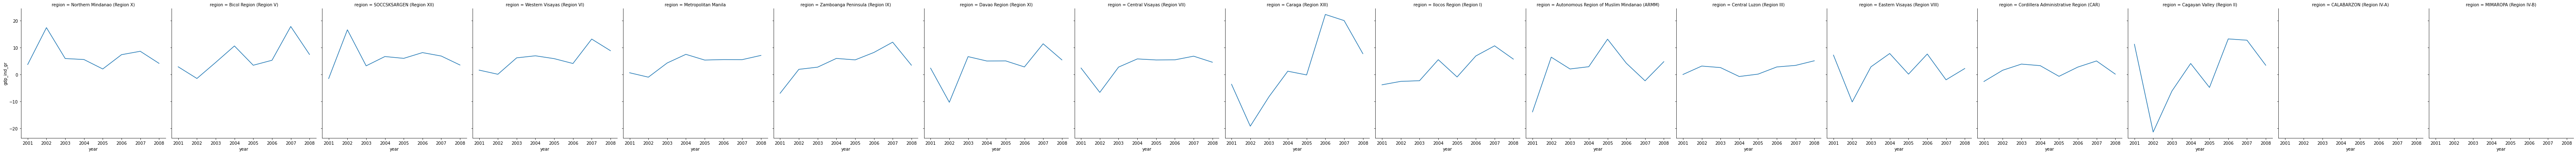

In [27]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_ind_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_ind_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p1_ind_gr.index)

In [28]:
#  Average service GDP growth per region, highest to lowest
top_ave_gdp_p1_svc_gr = df_gdp_p1.groupby(['region']).mean().sort_values(by='gdp_svc_gr', ascending=False)[['zone_code', 'gdp_svc_gr']]
top_ave_gdp_p1_svc_gr

zone_code  gdp_svc_gr
region                                                            
SOCCSKSARGEN (Region XII)                           15    8.364246
Northern Mindanao (Region X)                        14    8.017753
Metropolitan Manila                                 13    6.746551
Central Visayas (Region VII)                         7    6.608787
Western Visayas (Region VI)                         16    6.381391
Cordillera Administrative Region (CAR)               8    5.389945
Autonomous Region of Muslim Mindanao (ARMM)          1    4.998199
Central Luzon (Region III)                           6    4.995777
Ilocos Region (Region I)                            11    4.654781
Bicol Region (Region V)                              2    4.511480
Zamboanga Peninsula (Region IX)                     17    4.501915
Caraga (Region XIII)                                 5    4.384495
Eastern Visayas (Region VIII)                       10    4.365862
Cagayan Valley (Region II)                           4    4.040879
Davao Region (Region XI)                             9    1.954459
CALABARZON (Region IV-A)                             3         NaN
MIMAROPA (Region IV-B)                              12         NaN

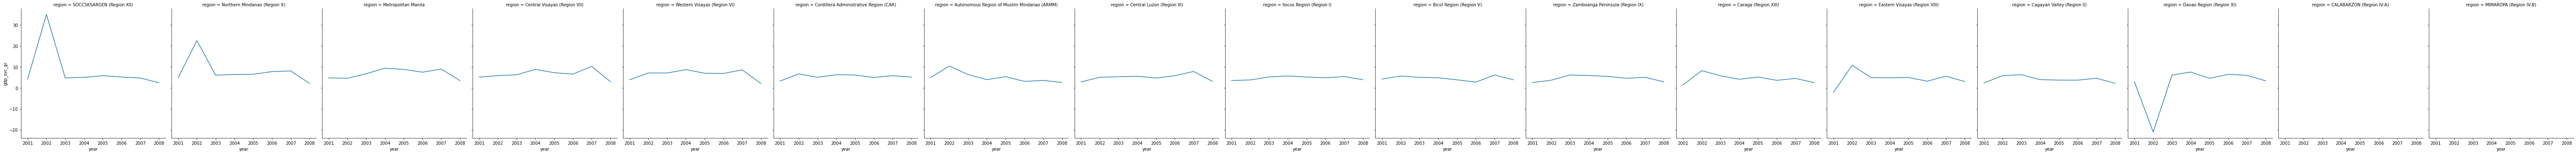

In [29]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_svc_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_svc_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p1_svc_gr.index)

In [30]:
#  Average agri GDP growth per region, highest to lowest
top_ave_gdp_p1_non_agr_gr = df_gdp_p1.groupby(['region']).mean().sort_values(by='gdp_non_agr_gr', ascending=False)[['zone_code', 'gdp_non_agr_gr']]
top_ave_gdp_p1_non_agr_gr

zone_code  gdp_non_agr_gr
region                                                                
Northern Mindanao (Region X)                        14        7.472615
SOCCSKSARGEN (Region XII)                           15        7.087600
Western Visayas (Region VI)                         16        6.158460
Metropolitan Manila                                 13        5.851730
Central Visayas (Region VII)                         7        5.397279
Bicol Region (Region V)                              2        5.120645
Zamboanga Peninsula (Region IX)                     17        4.332678
Autonomous Region of Muslim Mindanao (ARMM)          1        4.088268
Ilocos Region (Region I)                            11        4.005538
Central Luzon (Region III)                           6        3.492372
Caraga (Region XIII)                                 5        3.147596
Eastern Visayas (Region VIII)                       10        3.125151
Cagayan Valley (Region II)                           4        2.975809
Cordillera Administrative Region (CAR)               8        2.612350
Davao Region (Region XI)                             9        2.595417
CALABARZON (Region IV-A)                             3             NaN
MIMAROPA (Region IV-B)                              12             NaN

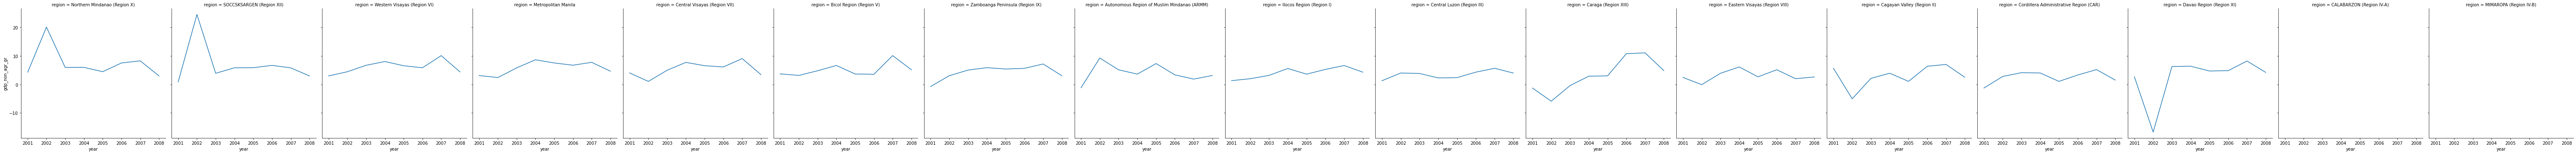

In [31]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdp_p1_non_agr_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_non_agr_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p1_non_agr_gr.index)

In [32]:
#  Average per capita GDP growth per region, highest to lowest
top_ave_gdppc_p1_gr = df_gdp_p1.groupby(['region']).mean().sort_values(by='gdppc_gr', ascending=False)[['zone_code', 'gdppc_gr']]
top_ave_gdppc_p1_gr

zone_code  gdppc_gr
region                                                          
SOCCSKSARGEN (Region XII)                           15  4.358420
Metropolitan Manila                                 13  4.272964
Davao Region (Region XI)                             9  4.267151
Northern Mindanao (Region X)                        14  3.629397
Western Visayas (Region VI)                         16  3.213319
Central Visayas (Region VII)                         7  2.840117
Bicol Region (Region V)                              2  2.810650
Zamboanga Peninsula (Region IX)                     17  2.592035
MIMAROPA (Region IV-B)                              12  2.094515
Ilocos Region (Region I)                            11  2.029950
CALABARZON (Region IV-A)                             3  1.450977
Eastern Visayas (Region VIII)                       10  1.388865
Central Luzon (Region III)                           6  1.374966
Caraga (Region XIII)                                 5  1.077162
Cagayan Valley (Region II)                           4  0.840255
Cordillera Administrative Region (CAR)               8  0.681705
Autonomous Region of Muslim Mindanao (ARMM)          1 -0.280518

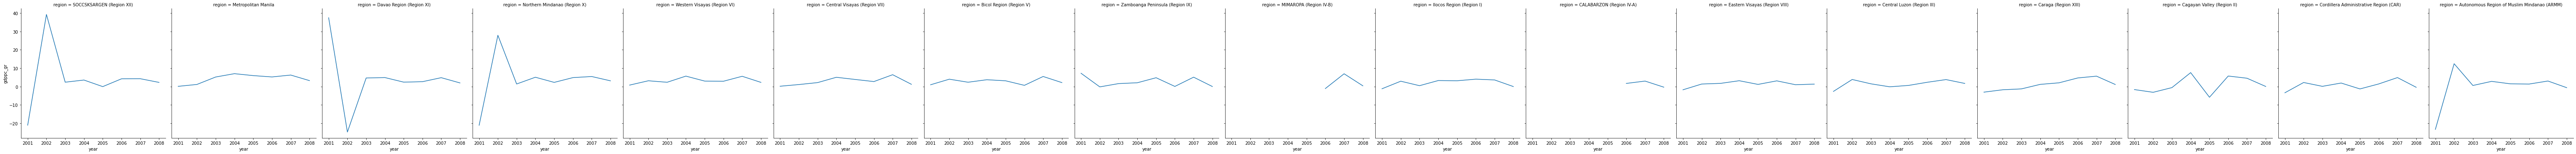

In [33]:
df = df_gdp_p1[df_gdp_p1['region'].isin(top_ave_gdppc_p1_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdppc_gr', col='region', kind='line', 
            col_order=top_ave_gdppc_p1_gr.index)

### Sample: 2009-2018

#### Regional GDP levels

In [34]:
#  Average GDP per region, highest to lowest
top_ave_gdp_p2 = df_gdp_p2.groupby(['region']).mean().sort_values(by='log_gdp', ascending=False)[['zone_code', 'log_gdp']]
top_ave_gdp_p2

zone_code    log_gdp
region                                                           
Metropolitan Manila                                 13  14.737289
CALABARZON (Region IV-A)                             3  13.994444
Central Luzon (Region III)                           6  13.380999
Central Visayas (Region VII)                         7  12.983289
Western Visayas (Region VI)                         16  12.543531
Davao Region (Region XI)                             9  12.531128
Northern Mindanao (Region X)                        14  12.470226
Ilocos Region (Region I)                            11  12.296397
SOCCSKSARGEN (Region XII)                           15  12.143633
Eastern Visayas (Region VIII)                       10  11.964001
Zamboanga Peninsula (Region IX)                     17  11.862401
Bicol Region (Region V)                              2  11.852380
Cordillera Administrative Region (CAR)               8  11.780458
Cagayan Valley (Region II)                           4  11.721844
MIMAROPA (Region IV-B)                              12  11.665679
Caraga (Region XIII)                                 5  11.333535
Autonomous Region of Muslim Mindanao (ARMM)          1  10.820757

In [35]:
# Create a heatmap visualizing average GDP

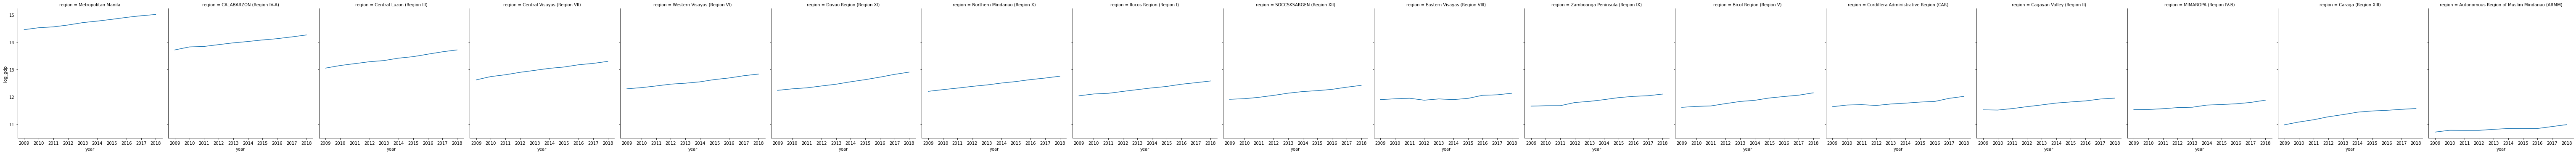

In [36]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp', col='region', kind='line', 
            col_order=top_ave_gdp_p2.index)

In [37]:
#  Average agri GDP per region, highest to lowest
top_ave_gdp_p2_agr = df_gdp_p2.groupby(['region']).mean().sort_values(by='log_gdp_agr', ascending=False)[['zone_code', 'log_gdp_agr']]
top_ave_gdp_p2_agr

zone_code  log_gdp_agr
region                                                             
Central Luzon (Region III)                           6    11.578839
CALABARZON (Region IV-A)                             3    11.158320
Western Visayas (Region VI)                         16    11.038567
Northern Mindanao (Region X)                        14    11.035768
SOCCSKSARGEN (Region XII)                           15    10.844728
Ilocos Region (Region I)                            11    10.820007
Cagayan Valley (Region II)                           4    10.729007
Davao Region (Region XI)                             9    10.639746
Bicol Region (Region V)                              2    10.376869
Zamboanga Peninsula (Region IX)                     17    10.334438
Autonomous Region of Muslim Mindanao (ARMM)          1    10.309333
Eastern Visayas (Region VIII)                       10    10.270584
Central Visayas (Region VII)                         7    10.263281
MIMAROPA (Region IV-B)                              12    10.212097
Caraga (Region XIII)                                 5     9.716602
Cordillera Administrative Region (CAR)               8     9.459881
Metropolitan Manila                                 13     8.636908

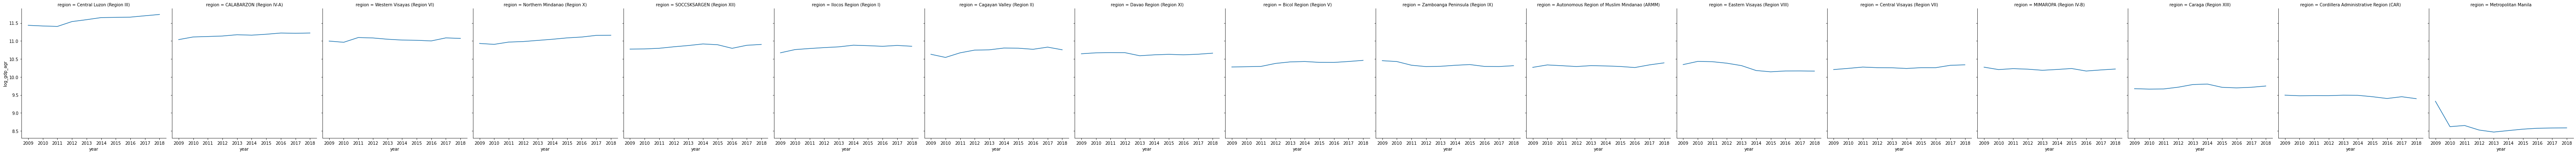

In [38]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_agr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp_agr', col='region', kind='line', 
            col_order=top_ave_gdp_p2_agr.index)

In [39]:
#  Average industry GDP per region, highest to lowest
top_ave_gdp_p2_ind = df_gdp_p2.groupby(['region']).mean().sort_values(by='log_gdp_ind', ascending=False)[['zone_code', 'log_gdp_ind']]
top_ave_gdp_p2_ind

zone_code  log_gdp_ind
region                                                             
CALABARZON (Region IV-A)                             3    13.510487
Metropolitan Manila                                 13    13.037285
Central Luzon (Region III)                           6    12.538777
Central Visayas (Region VII)                         7    11.988390
Davao Region (Region XI)                             9    11.423770
Northern Mindanao (Region X)                        14    11.385461
Cordillera Administrative Region (CAR)               8    11.134516
Eastern Visayas (Region VIII)                       10    11.104934
SOCCSKSARGEN (Region XII)                           15    11.061786
Ilocos Region (Region I)                            11    10.983297
Western Visayas (Region VI)                         16    10.926723
Zamboanga Peninsula (Region IX)                     17    10.795141
MIMAROPA (Region IV-B)                              12    10.591580
Bicol Region (Region V)                              2    10.265349
Caraga (Region XIII)                                 5    10.220978
Cagayan Valley (Region II)                           4     9.667367
Autonomous Region of Muslim Mindanao (ARMM)          1     7.916271

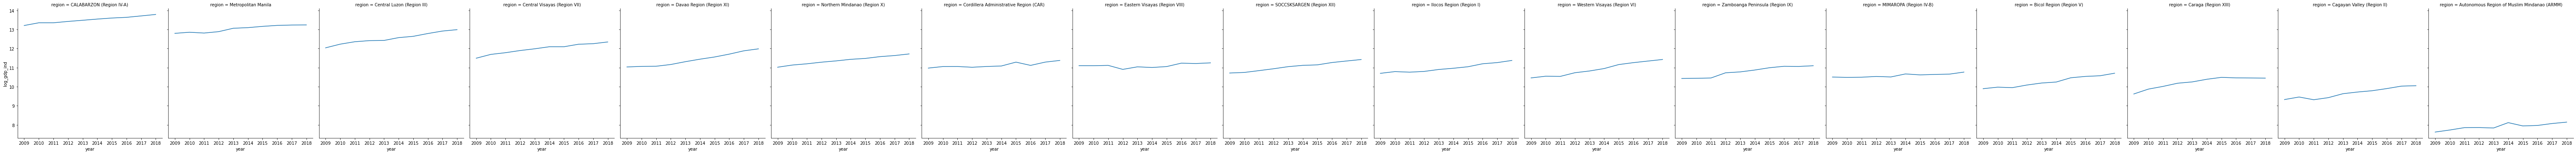

In [40]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_ind.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp_ind', col='region', kind='line', 
            col_order=top_ave_gdp_p2_ind.index)

In [41]:
#  Average service GDP per region, highest to lowest
top_ave_gdp_p2_svc = df_gdp_p2.groupby(['region']).mean().sort_values(by='log_gdp_svc', ascending=False)[['zone_code', 'log_gdp_svc']]
top_ave_gdp_p2_svc

zone_code  log_gdp_svc
region                                                             
Metropolitan Manila                                 13    14.532344
CALABARZON (Region IV-A)                             3    12.869121
Central Luzon (Region III)                           6    12.468350
Central Visayas (Region VII)                         7    12.408235
Western Visayas (Region VI)                         16    11.987786
Davao Region (Region XI)                             9    11.862348
Northern Mindanao (Region X)                        14    11.608315
Ilocos Region (Region I)                            11    11.603038
Bicol Region (Region V)                              2    11.279685
SOCCSKSARGEN (Region XII)                           15    11.188460
Cagayan Valley (Region II)                           4    11.025375
Zamboanga Peninsula (Region IX)                     17    11.024555
Eastern Visayas (Region VIII)                       10    11.015884
Cordillera Administrative Region (CAR)               8    10.838230
MIMAROPA (Region IV-B)                              12    10.800507
Caraga (Region XIII)                                 5    10.573595
Autonomous Region of Muslim Mindanao (ARMM)          1     9.751328

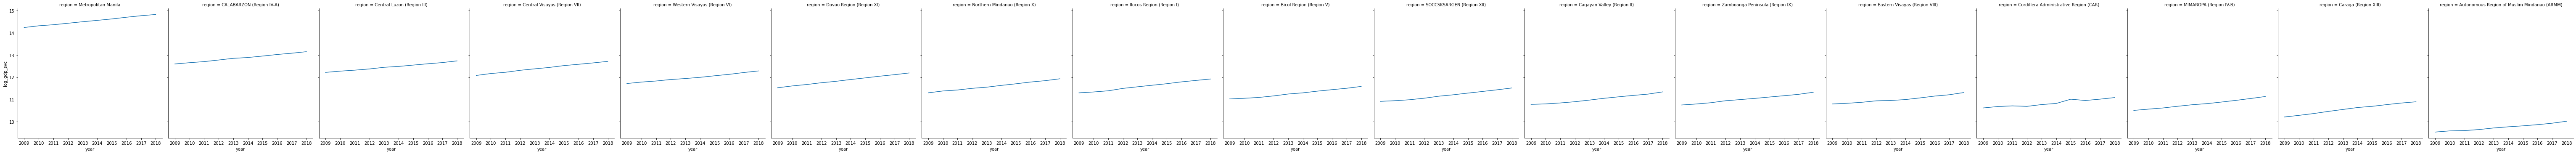

In [42]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_svc.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp_svc', col='region', kind='line', 
            col_order=top_ave_gdp_p2_svc.index)

In [43]:
#  Average non-agri GDP per region, highest to lowest
top_ave_gdp_p2_non_agr = df_gdp_p2.groupby(['region']).mean().sort_values(by='log_gdp_non_agr', ascending=False)[['zone_code', 'log_gdp_non_agr']]
top_ave_gdp_p2_non_agr

zone_code  log_gdp_non_agr
region                                                                 
Metropolitan Manila                                 13        14.734852
CALABARZON (Region IV-A)                             3        13.933572
Central Luzon (Region III)                           6        13.199430
Central Visayas (Region VII)                         7        12.913866
Davao Region (Region XI)                             9        12.362126
Western Visayas (Region VI)                         16        12.287609
Northern Mindanao (Region X)                        14        12.196294
Ilocos Region (Region I)                            11        12.033870
SOCCSKSARGEN (Region XII)                           15        11.820483
Eastern Visayas (Region VIII)                       10        11.756615
Cordillera Administrative Region (CAR)               8        11.690863
Zamboanga Peninsula (Region IX)                     17        11.610659
Bicol Region (Region V)                              2        11.589979
MIMAROPA (Region IV-B)                              12        11.396464
Cagayan Valley (Region II)                           4        11.254927
Caraga (Region XIII)                                 5        11.107287
Autonomous Region of Muslim Mindanao (ARMM)          1         9.899767

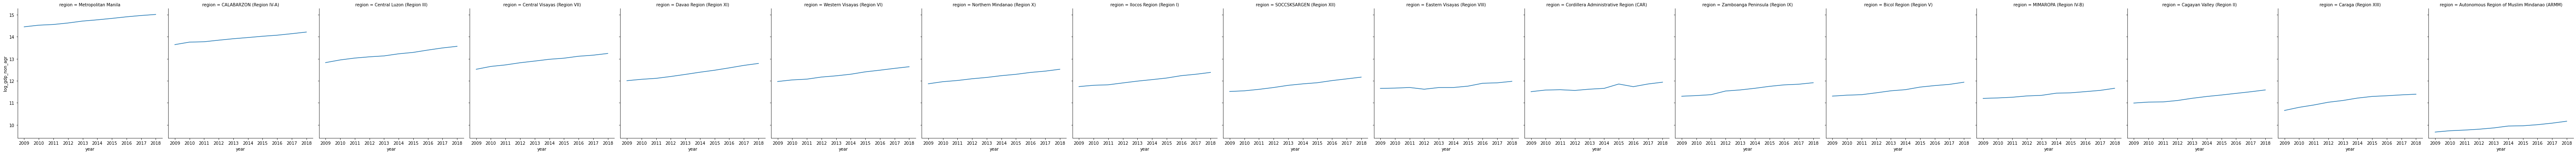

In [44]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_non_agr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdp_non_agr', col='region', kind='line', 
            col_order=top_ave_gdp_p2_non_agr.index)

In [45]:
#  Average per capita GDP per region, highest to lowest
top_ave_gdppc_p2 = df_gdp_p2.groupby(['region']).mean().sort_values(by='log_gdppc', ascending=False)[['zone_code', 'log_gdppc']]
top_ave_gdppc_p2

zone_code  log_gdppc
region                                                           
Metropolitan Manila                                 13  12.212884
CALABARZON (Region IV-A)                             3  11.373687
Cordillera Administrative Region (CAR)               8  11.231581
Central Visayas (Region VII)                         7  11.001166
Central Luzon (Region III)                           6  10.998467
Davao Region (Region XI)                             9  10.961100
Northern Mindanao (Region X)                        14  10.945851
Ilocos Region (Region I)                            11  10.685926
SOCCSKSARGEN (Region XII)                           15  10.649501
MIMAROPA (Region IV-B)                              12  10.578481
Zamboanga Peninsula (Region IX)                     17  10.567379
Western Visayas (Region VI)                         16  10.527148
Cagayan Valley (Region II)                           4  10.493985
Eastern Visayas (Region VIII)                       10  10.486910
Caraga (Region XIII)                                 5  10.372624
Bicol Region (Region V)                              2  10.091690
Autonomous Region of Muslim Mindanao (ARMM)          1   9.556752

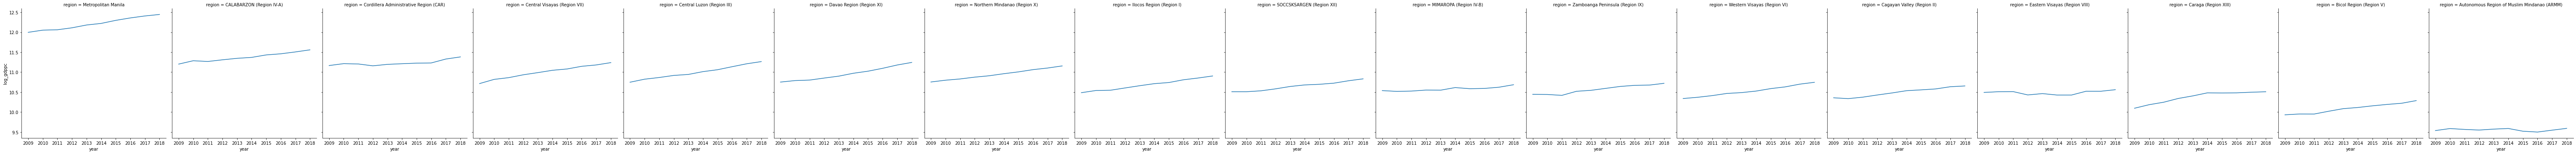

In [46]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdppc_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_gdppc', col='region', kind='line', 
            col_order=top_ave_gdppc_p2.index)

#### Regional GDP growth

In [47]:
# Exclude 2009 from growth analysis
df_gdp_p2 = df_gdp_p2[df_gdp_p2['year'] > '2009-01-01']

In [48]:
#  Average GDP growth per region, highest to lowest
top_ave_gdp_p2_gr = df_gdp_p2.groupby(['region']).mean().sort_values(by='gdp_gr', ascending=False)[['zone_code', 'gdp_gr']]
top_ave_gdp_p2_gr

zone_code    gdp_gr
region                                                          
Central Visayas (Region VII)                         7  7.830527
Davao Region (Region XI)                             9  7.713048
Central Luzon (Region III)                           6  7.696741
Caraga (Region XIII)                                 5  6.898735
Metropolitan Manila                                 13  6.390067
Northern Mindanao (Region X)                        14  6.368651
CALABARZON (Region IV-A)                             3  6.299168
Ilocos Region (Region I)                            11  6.229790
Western Visayas (Region VI)                         16  6.186100
Bicol Region (Region V)                              2  6.108506
SOCCSKSARGEN (Region XII)                           15  5.855080
Zamboanga Peninsula (Region IX)                     17  5.079766
Cagayan Valley (Region II)                           4  4.898002
Cordillera Administrative Region (CAR)               8  4.385884
MIMAROPA (Region IV-B)                              12  3.880972
Autonomous Region of Muslim Mindanao (ARMM)          1  3.109684
Eastern Visayas (Region VIII)                       10  2.750079

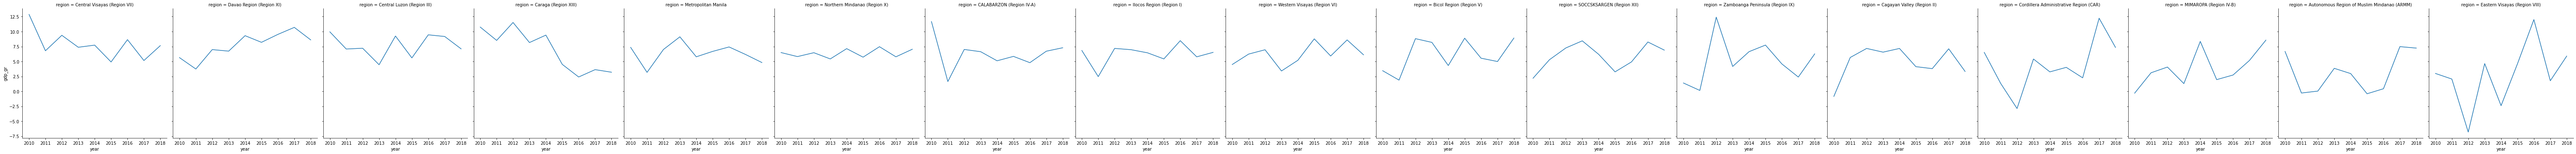

In [49]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p2_gr.index)

In [50]:
#  Average agri GDP growth per region, highest to lowest
top_ave_gdp_p2_agr_gr = df_gdp_p2.groupby(['region']).mean().sort_values(by='gdp_agr_gr', ascending=False)[['zone_code', 'gdp_agr_gr']]
top_ave_gdp_p2_agr_gr

zone_code  gdp_agr_gr
region                                                            
Central Luzon (Region III)                           6    3.513531
Northern Mindanao (Region X)                        14    2.607905
Bicol Region (Region V)                              2    2.115180
Ilocos Region (Region I)                            11    2.096256
CALABARZON (Region IV-A)                             3    2.088576
Cagayan Valley (Region II)                           4    1.630254
SOCCSKSARGEN (Region XII)                           15    1.570676
Central Visayas (Region VII)                         7    1.512059
Autonomous Region of Muslim Mindanao (ARMM)          1    1.480967
Western Visayas (Region VI)                         16    0.986869
Caraga (Region XIII)                                 5    0.932347
Davao Region (Region XI)                             9    0.234754
MIMAROPA (Region IV-B)                              12   -0.500733
Cordillera Administrative Region (CAR)               8   -1.026829
Zamboanga Peninsula (Region IX)                     17   -1.454291
Eastern Visayas (Region VIII)                       10   -1.821569
Metropolitan Manila                                 13   -5.878900

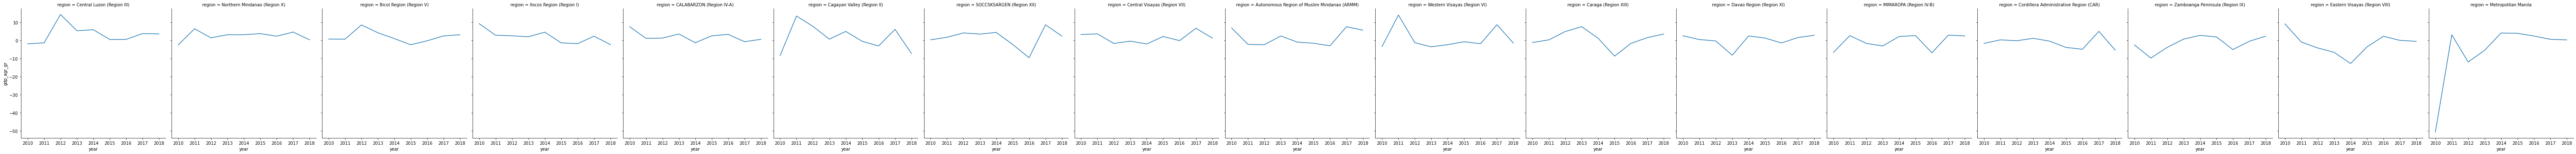

In [51]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_agr_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_agr_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p2_agr_gr.index)

In [52]:
#  Average industry GDP growth per region, highest to lowest
top_ave_gdp_p2_ind_gr = df_gdp_p2.groupby(['region']).mean().sort_values(by='gdp_ind_gr', ascending=False)[['zone_code', 'gdp_ind_gr']]
top_ave_gdp_p2_ind_gr

zone_code  gdp_ind_gr
region                                                            
Western Visayas (Region VI)                         16   11.533415
Central Luzon (Region III)                           6   11.327587
Davao Region (Region XI)                             9   11.276126
Caraga (Region XIII)                                 5   10.116244
Central Visayas (Region VII)                         7   10.083379
Bicol Region (Region V)                              2    9.672339
Cagayan Valley (Region II)                           4    8.847132
SOCCSKSARGEN (Region XII)                           15    8.227937
Zamboanga Peninsula (Region IX)                     17    8.063583
Northern Mindanao (Region X)                        14    8.055077
Ilocos Region (Region I)                            11    7.923873
CALABARZON (Region IV-A)                             3    6.711658
Autonomous Region of Muslim Mindanao (ARMM)          1    6.658880
Metropolitan Manila                                 13    5.186379
Cordillera Administrative Region (CAR)               8    5.131833
MIMAROPA (Region IV-B)                              12    3.134184
Eastern Visayas (Region VIII)                       10    2.194333

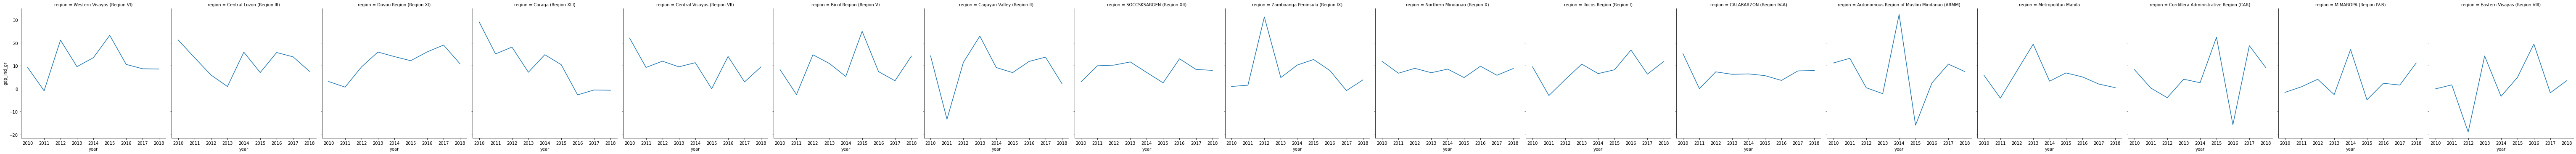

In [53]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_ind_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_ind_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p2_ind_gr.index)

In [54]:
#  Average service GDP growth per region, highest to lowest
top_ave_gdp_p2_svc_gr = df_gdp_p2.groupby(['region']).mean().sort_values(by='gdp_svc_gr', ascending=False)[['zone_code', 'gdp_svc_gr']]
top_ave_gdp_p2_svc_gr

zone_code  gdp_svc_gr
region                                                            
Caraga (Region XIII)                                 5    7.881130
Davao Region (Region XI)                             9    7.672254
Central Visayas (Region VII)                         7    7.300418
Northern Mindanao (Region X)                        14    7.267576
MIMAROPA (Region IV-B)                              12    7.201434
Ilocos Region (Region I)                            11    7.184853
SOCCSKSARGEN (Region XII)                           15    6.935701
Metropolitan Manila                                 13    6.747271
Zamboanga Peninsula (Region IX)                     17    6.580397
Western Visayas (Region VI)                         16    6.519001
Bicol Region (Region V)                              2    6.490070
Cagayan Valley (Region II)                           4    6.458296
CALABARZON (Region IV-A)                             3    6.334634
Eastern Visayas (Region VIII)                       10    5.928414
Central Luzon (Region III)                           6    5.927915
Autonomous Region of Muslim Mindanao (ARMM)          1    5.577600
Cordillera Administrative Region (CAR)               8    5.560146

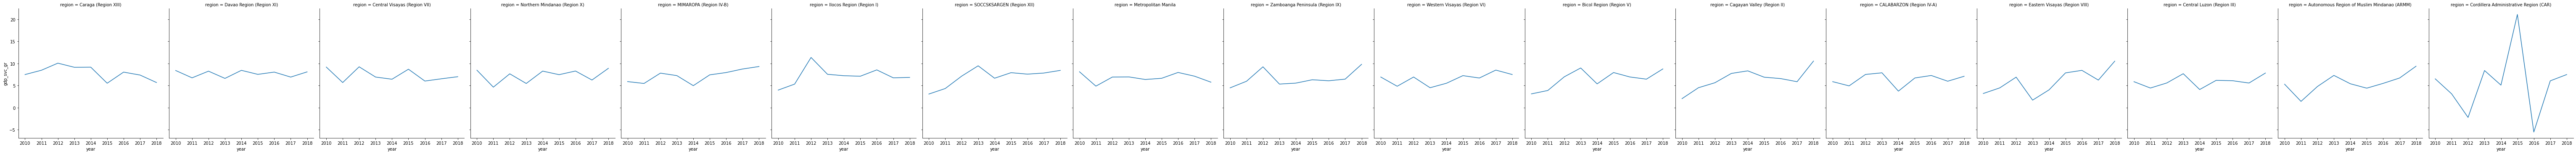

In [55]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_svc_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_svc_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p2_svc_gr.index)

In [56]:
#  Average non-agri GDP growth per region, highest to lowest
top_ave_gdp_p2_non_agr_gr = df_gdp_p2.groupby(['region']).mean().sort_values(by='gdp_non_agr_gr', ascending=False)[['zone_code', 'gdp_non_agr_gr']]
top_ave_gdp_p2_non_agr_gr

zone_code  gdp_non_agr_gr
region                                                                
Davao Region (Region XI)                             9        9.107523
Caraga (Region XIII)                                 5        8.625399
Central Luzon (Region III)                           6        8.591744
Central Visayas (Region VII)                         7        8.322193
Western Visayas (Region VI)                         16        7.757756
Northern Mindanao (Region X)                        14        7.609296
SOCCSKSARGEN (Region XII)                           15        7.521662
Ilocos Region (Region I)                            11        7.419872
Bicol Region (Region V)                              2        7.299521
Zamboanga Peninsula (Region IX)                     17        7.141142
Cagayan Valley (Region II)                           4        6.863888
CALABARZON (Region IV-A)                             3        6.564286
Metropolitan Manila                                 13        6.441460
Autonomous Region of Muslim Mindanao (ARMM)          1        5.636789
MIMAROPA (Region IV-B)                              12        5.280378
Cordillera Administrative Region (CAR)               8        5.262667
Eastern Visayas (Region VIII)                       10        3.785791

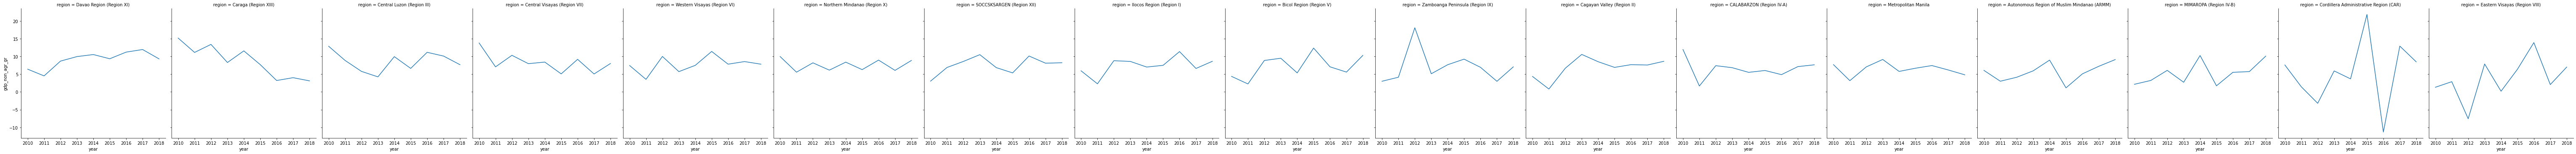

In [57]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdp_p2_non_agr_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdp_non_agr_gr', col='region', kind='line', 
            col_order=top_ave_gdp_p2_non_agr_gr.index)

In [58]:
#  Average per capita GDP growth per region, highest to lowest
top_ave_gdppc_p2_gr = df_gdp_p2.groupby(['region']).mean().sort_values(by='gdppc_gr', ascending=False)[['zone_code', 'gdppc_gr']]
top_ave_gdppc_p2_gr

zone_code  gdppc_gr
region                                                          
Central Visayas (Region VII)                         7  6.024378
Central Luzon (Region III)                           6  5.921033
Davao Region (Region XI)                             9  5.634314
Metropolitan Manila                                 13  5.114420
Ilocos Region (Region I)                            11  4.777537
Caraga (Region XIII)                                 5  4.759047
Western Visayas (Region VI)                         16  4.624691
Northern Mindanao (Region X)                        14  4.573633
CALABARZON (Region IV-A)                             3  4.083893
Bicol Region (Region V)                              2  4.056730
SOCCSKSARGEN (Region XII)                           15  3.666251
Cagayan Valley (Region II)                           4  3.376293
Zamboanga Peninsula (Region IX)                     17  3.172597
Cordillera Administrative Region (CAR)               8  2.507812
MIMAROPA (Region IV-B)                              12  1.699697
Eastern Visayas (Region VIII)                       10  0.869295
Autonomous Region of Muslim Mindanao (ARMM)          1  0.690020

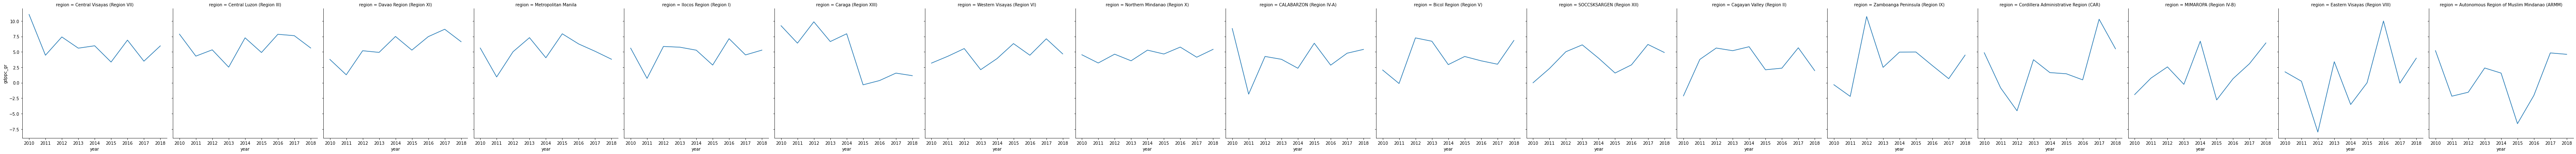

In [59]:
df = df_gdp_p2[df_gdp_p2['region'].isin(top_ave_gdppc_p2_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='gdppc_gr', col='region', kind='line', 
            col_order=top_ave_gdppc_p2_gr.index)

### 2000-08 vs 2009-18

In [60]:
df_gdp.replace([np.inf, -np.inf], np.nan, inplace=True)
df_gdp['period'] = '2000-2008'
df_gdp.loc[df_gdp['year'] >= '2009-01-01', 'period'] = '2009-2018'

<AxesSubplot:xlabel='log_gdp', ylabel='Count'>

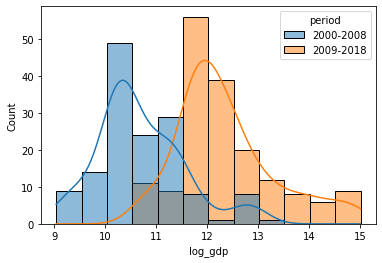

In [61]:
sns.histplot(data=df_gdp, x='log_gdp', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='log_gdp'>

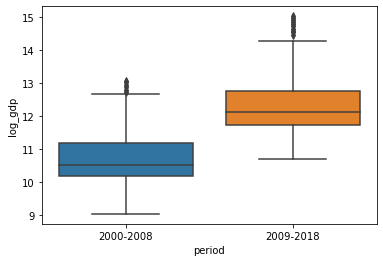

In [62]:
sns.boxplot(data=df_gdp, x='period', y='log_gdp')

<AxesSubplot:xlabel='log_gdp_agr', ylabel='Count'>

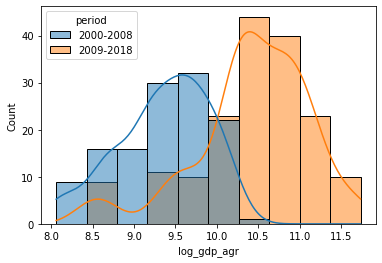

In [63]:
sns.histplot(data=df_gdp, x='log_gdp_agr', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='log_gdp_agr'>

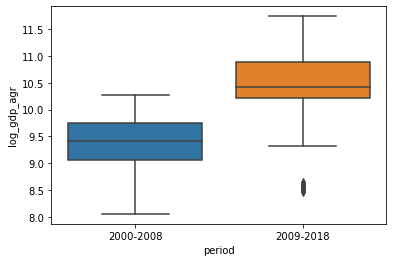

In [64]:
sns.boxplot(data=df_gdp, x='period', y='log_gdp_agr')

<AxesSubplot:xlabel='log_gdp_ind', ylabel='Count'>

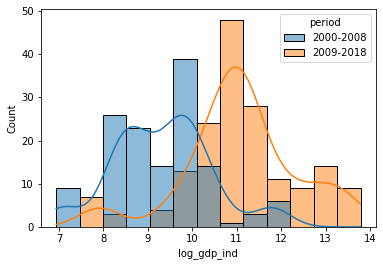

In [65]:
sns.histplot(data=df_gdp, x='log_gdp_ind', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='log_gdp_ind'>

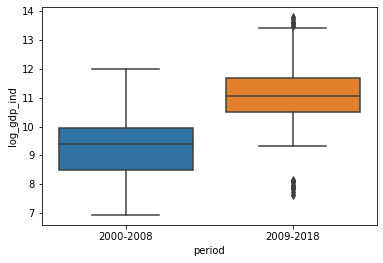

In [66]:
sns.boxplot(data=df_gdp, x='period', y='log_gdp_ind')

<AxesSubplot:xlabel='log_gdp_svc', ylabel='Count'>

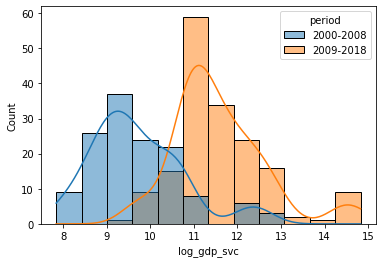

In [67]:
sns.histplot(data=df_gdp, x='log_gdp_svc', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='log_gdp_svc'>

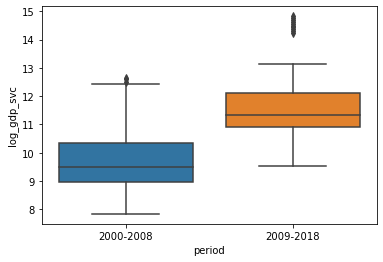

In [68]:
sns.boxplot(data=df_gdp, x='period', y='log_gdp_svc')

<AxesSubplot:xlabel='log_gdp_non_agr', ylabel='Count'>

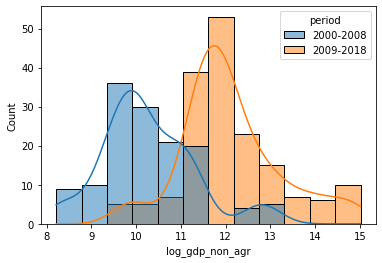

In [69]:
sns.histplot(data=df_gdp, x='log_gdp_non_agr', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='log_gdp_non_agr'>

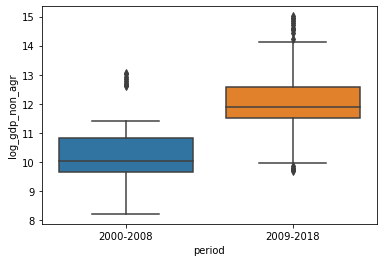

In [70]:
sns.boxplot(data=df_gdp, x='period', y='log_gdp_non_agr')

<AxesSubplot:xlabel='log_gdppc', ylabel='Count'>

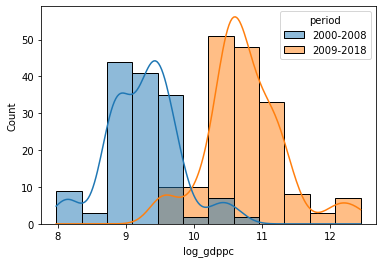

In [71]:
sns.histplot(data=df_gdp, x='log_gdppc', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='log_gdppc'>

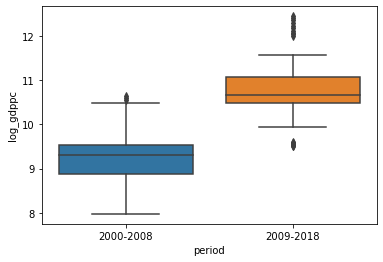

In [72]:
sns.boxplot(data=df_gdp, x='period', y='log_gdppc')

<AxesSubplot:xlabel='gdp_gr', ylabel='Count'>

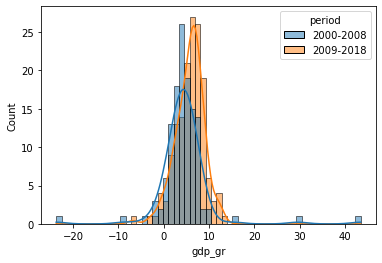

In [73]:
df = df_gdp[df_gdp['year'] != '2009-01-01']
sns.histplot(data=df, x='gdp_gr', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='gdp_gr'>

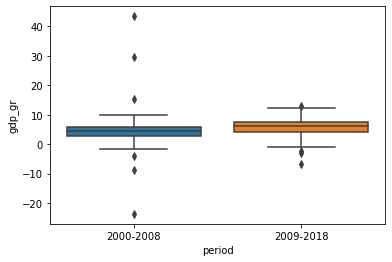

In [74]:
sns.boxplot(data=df, x='period', y='gdp_gr')

<AxesSubplot:xlabel='gdp_agr_gr', ylabel='Count'>

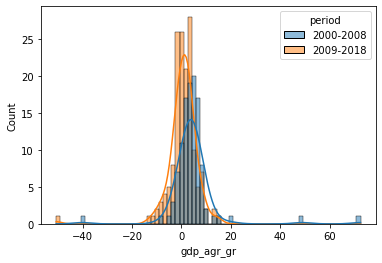

In [75]:
sns.histplot(data=df, x='gdp_agr_gr', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='gdp_agr_gr'>

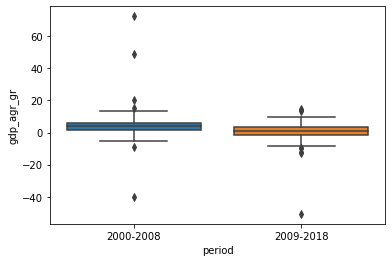

In [76]:
sns.boxplot(data=df, x='period', y='gdp_agr_gr')

<AxesSubplot:xlabel='gdp_ind_gr', ylabel='Count'>

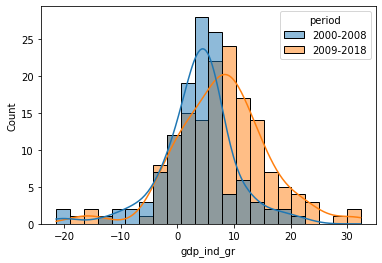

In [77]:
sns.histplot(data=df, x='gdp_ind_gr', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='gdp_ind_gr'>

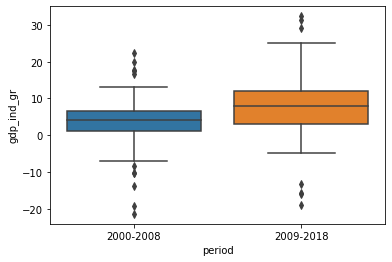

In [78]:
sns.boxplot(data=df, x='period', y='gdp_ind_gr')

<AxesSubplot:xlabel='gdp_svc_gr', ylabel='Count'>

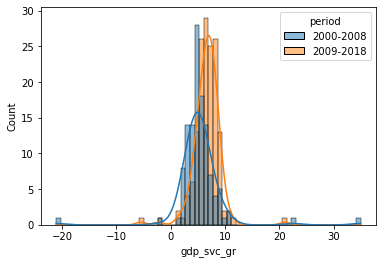

In [79]:
sns.histplot(data=df, x='gdp_svc_gr', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='gdp_svc_gr'>

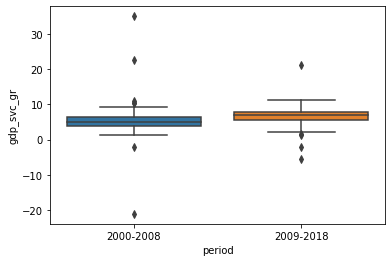

In [80]:
sns.boxplot(data=df, x='period', y='gdp_svc_gr')

<AxesSubplot:xlabel='gdp_non_agr_gr', ylabel='Count'>

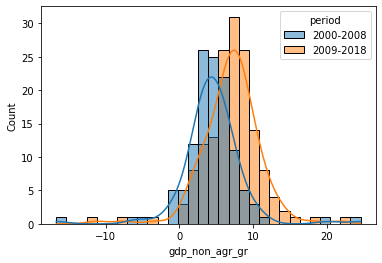

In [81]:
sns.histplot(data=df, x='gdp_non_agr_gr', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='gdp_non_agr_gr'>

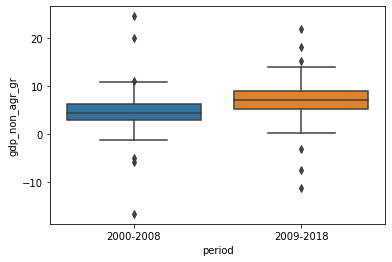

In [82]:
sns.boxplot(data=df, x='period', y='gdp_non_agr_gr')

<AxesSubplot:xlabel='gdppc_gr', ylabel='Count'>

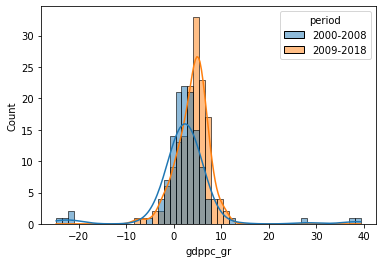

In [83]:
sns.histplot(data=df, x='gdppc_gr', hue='period', kde=True)

<AxesSubplot:xlabel='period', ylabel='gdppc_gr'>

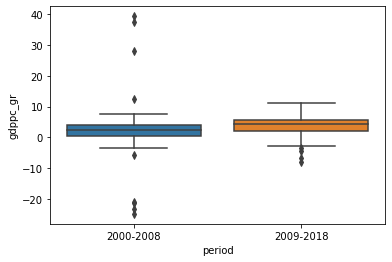

In [84]:
sns.boxplot(data=df, x='period', y='gdppc_gr')

## Nighttime Lights (NTL)

In [85]:
df_ntl = pd.read_csv(path + "data/scratch/data.csv", index_col=False,
                     usecols=['YEAR', 'REGION', 'ZONE_CODE', 'NTL_COUNT', 'NTL_SUM'], 
                     parse_dates=['YEAR'])
df_ntl.columns = [i.lower() for i in df_ntl.columns]

In [86]:
df_ntl = df_ntl.assign(log_ntl_sum = lambda x: np.log(x.ntl_sum))

In [87]:
ntl_growth = pd.DataFrame(df_ntl.set_index(['region', 'year']).groupby('zone_code').pct_change() * 100).reset_index()

In [88]:
df_ntl = df_ntl.set_index(['region', 'year']).join(ntl_growth.set_index(['region', 'year']), rsuffix='_gr').reset_index()

In [89]:
df_ntl.drop(columns=['ntl_count_gr', 'log_ntl_sum_gr'], inplace=True)

### Regional NTL levels

#### Full sample: 2000-2018

In [90]:
#  19-year average NTL per region, highest to lowest
top_ave_ntl = df_ntl.groupby(['region']).mean().sort_values(by='log_ntl_sum', ascending=False)[['zone_code', 'log_ntl_sum']]
top_ave_ntl

zone_code  log_ntl_sum
region                                                             
Metropolitan Manila                               13.0    10.865002
CALABARZON (Region IV-A)                           3.0    10.009558
Central Luzon (Region III)                         6.0     9.539528
Central Visayas (Region VII)                       7.0     9.079324
Davao Region (Region XI)                           9.0     8.652765
Western Visayas (Region VI)                       16.0     8.198079
Northern Mindanao (Region X)                      14.0     8.166820
SOCCSKSARGEN (Region XII)                         15.0     7.693008
Cordillera Administrative Region (CAR)             8.0     7.484121
Ilocos Region (Region I)                          11.0     7.476317
Zamboanga Peninsula (Region IX)                   17.0     7.164367
Bicol Region (Region V)                            2.0     6.942834
Eastern Visayas (Region VIII)                     10.0     6.666734
Caraga (Region XIII)                               5.0     6.625176
Autonomous Region of Muslim Mindanao (ARMM)        1.0     6.144531
MIMAROPA (Region IV-B)                            12.0     5.852864
Cagayan Valley (Region II)                         4.0     5.784843

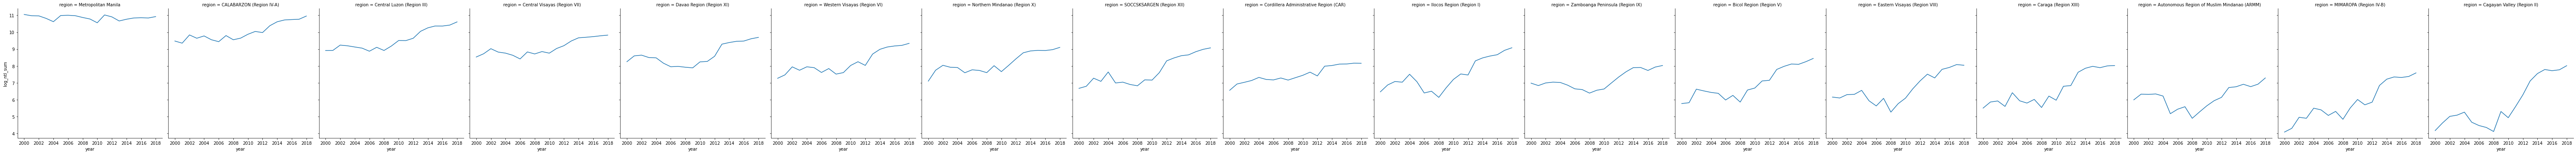

In [91]:
df = df_ntl[df_ntl['region'].isin(top_ave_ntl.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_ntl_sum', col='region', kind='line', 
            col_order=top_ave_ntl.index)

#### Sample: 2000-2008

In [92]:
#  Average NTL per region, highest to lowest
df_ntl_p1 = df_ntl[df_ntl['year'] < '2009-01-01']
top_ave_ntl_p1 = df_ntl_p1.groupby(['region']).mean().sort_values(by='log_ntl_sum', ascending=False)[['zone_code', 'log_ntl_sum']]
top_ave_ntl_p1

zone_code  log_ntl_sum
region                                                             
Metropolitan Manila                                 13    10.918876
CALABARZON (Region IV-A)                             3     9.603846
Central Luzon (Region III)                           6     9.038550
Central Visayas (Region VII)                         7     8.717720
Davao Region (Region XI)                             9     8.277967
Northern Mindanao (Region X)                        14     7.716046
Western Visayas (Region VI)                         16     7.697486
Cordillera Administrative Region (CAR)               8     7.091695
SOCCSKSARGEN (Region XII)                           15     7.029009
Zamboanga Peninsula (Region IX)                     17     6.822441
Ilocos Region (Region I)                            11     6.789146
Bicol Region (Region V)                              2     6.187184
Eastern Visayas (Region VIII)                       10     6.042576
Caraga (Region XIII)                                 5     5.848834
Autonomous Region of Muslim Mindanao (ARMM)          1     5.814067
MIMAROPA (Region IV-B)                              12     4.933501
Cagayan Valley (Region II)                           4     4.645118

#### Sample: 2009-2018

In [93]:
#  Average NTL per region, highest to lowest
df_ntl_p2 = df_ntl[df_ntl['year'] >= '2009-01-01']
top_ave_ntl_p2 = df_ntl_p2.groupby(['region']).mean().sort_values(by='log_ntl_sum', ascending=False)[['zone_code', 'log_ntl_sum']]
top_ave_ntl_p2

zone_code  log_ntl_sum
region                                                             
Metropolitan Manila                               13.0    10.816515
CALABARZON (Region IV-A)                           3.0    10.374698
Central Luzon (Region III)                         6.0     9.990408
Central Visayas (Region VII)                       7.0     9.404769
Davao Region (Region XI)                           9.0     8.990082
Western Visayas (Region VI)                       16.0     8.648614
Northern Mindanao (Region X)                      14.0     8.572516
SOCCSKSARGEN (Region XII)                         15.0     8.290608
Ilocos Region (Region I)                          11.0     8.094771
Cordillera Administrative Region (CAR)             8.0     7.837304
Bicol Region (Region V)                            2.0     7.622918
Zamboanga Peninsula (Region IX)                   17.0     7.472101
Caraga (Region XIII)                               5.0     7.323883
Eastern Visayas (Region VIII)                     10.0     7.228475
Cagayan Valley (Region II)                         4.0     6.810597
MIMAROPA (Region IV-B)                            12.0     6.680292
Autonomous Region of Muslim Mindanao (ARMM)        1.0     6.441948

### Regional NTL growth

#### Full sample: 2000-2018

In [218]:
#  Average NTL growth per region, highest to lowest
top_ave_ntl_gr = df_ntl.groupby(['region']).mean().sort_values(by='ntl_sum_gr', ascending=False)[['zone_code', 'ntl_sum_gr']]
top_ave_ntl_gr

zone_code  ntl_sum_gr
region                                                            
Cagayan Valley (Region II)                         4.0   36.826769
MIMAROPA (Region IV-B)                            12.0   30.547518
Caraga (Region XIII)                               5.0   25.233898
Ilocos Region (Region I)                          11.0   22.955616
Bicol Region (Region V)                            2.0   22.473170
SOCCSKSARGEN (Region XII)                         15.0   19.321061
Eastern Visayas (Region VIII)                     10.0   18.456302
Western Visayas (Region VI)                       16.0   16.024657
Northern Mindanao (Region X)                      14.0   15.472099
Autonomous Region of Muslim Mindanao (ARMM)        1.0   14.156420
Central Luzon (Region III)                         6.0   11.496601
Davao Region (Region XI)                           9.0   11.442795
Cordillera Administrative Region (CAR)             8.0   11.099741
CALABARZON (Region IV-A)                           3.0   11.035987
Central Visayas (Region VII)                       7.0    9.206213
Zamboanga Peninsula (Region IX)                   17.0    7.836002
Metropolitan Manila                               13.0    1.029379

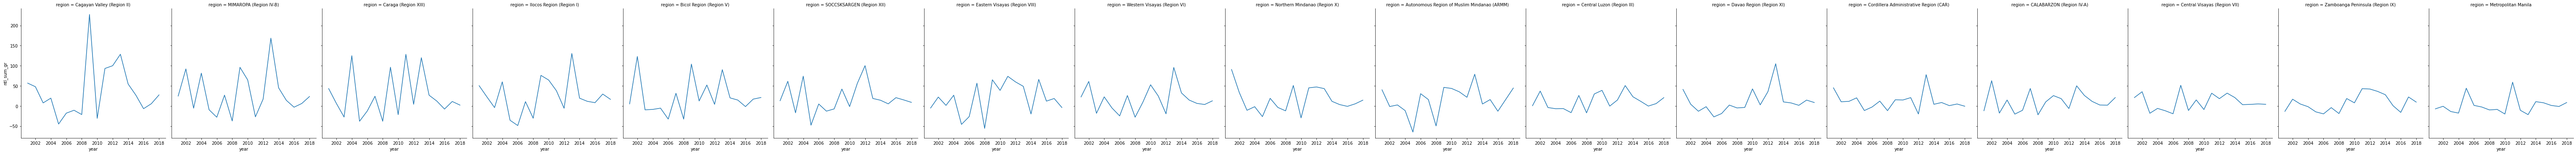

In [219]:
df = df_ntl[df_ntl['region'].isin(top_ave_ntl_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='ntl_sum_gr', col='region', kind='line', 
            col_order=top_ave_ntl_gr.index)

#### Sample: 2000-2008

In [220]:
#  Average NTL growth per region, highest to lowest
top_ave_ntl_gr_p1 = df_ntl_p1.groupby(['region']).mean().sort_values(by='ntl_sum_gr', ascending=False)[['zone_code', 'ntl_sum_gr']]
top_ave_ntl_gr_p1

zone_code  ntl_sum_gr
region                                                            
MIMAROPA (Region IV-B)                              12   18.095037
Northern Mindanao (Region X)                        14   11.049252
Caraga (Region XIII)                                 5   10.323761
Cordillera Administrative Region (CAR)               8    9.177118
Bicol Region (Region V)                              2    8.824060
SOCCSKSARGEN (Region XII)                           15    8.524696
Western Visayas (Region VI)                         16    7.003570
Central Visayas (Region VII)                         7    5.095948
CALABARZON (Region IV-A)                             3    4.779910
Cagayan Valley (Region II)                           4    4.590440
Ilocos Region (Region I)                            11    3.119466
Central Luzon (Region III)                           6    1.559210
Metropolitan Manila                                 13   -0.820041
Davao Region (Region XI)                             9   -2.290984
Eastern Visayas (Region VIII)                       10   -3.305769
Autonomous Region of Muslim Mindanao (ARMM)          1   -4.799230
Zamboanga Peninsula (Region IX)                     17   -6.374662

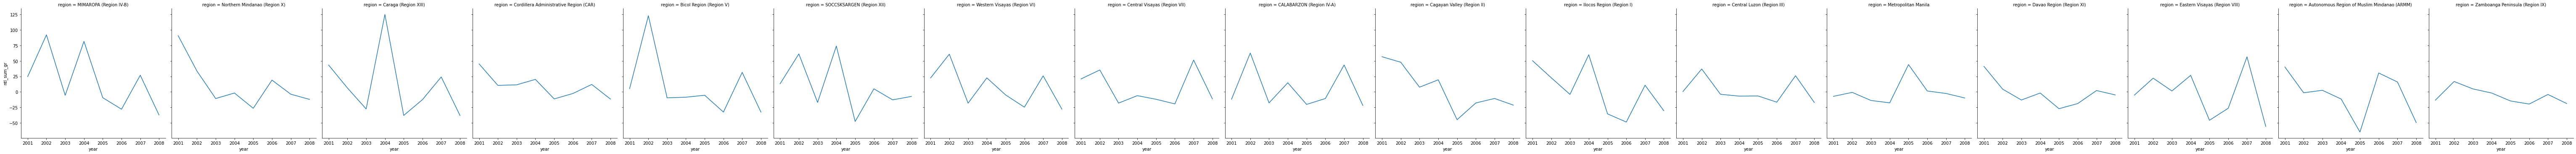

In [221]:
df = df_ntl_p1[df_ntl_p1['region'].isin(top_ave_ntl_gr_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='ntl_sum_gr', col='region', kind='line', 
            col_order=top_ave_ntl_gr_p1.index)

#### Sample: 2009-2018

In [222]:
#  Average NTL growth per region, highest to lowest
df_ntl_p2 = df_ntl[df_ntl['year'] >= '2010-01-01']
top_ave_ntl_gr_p2 = df_ntl_p2.groupby(['region']).mean().sort_values(by='ntl_sum_gr', ascending=False)[['zone_code', 'ntl_sum_gr']]
top_ave_ntl_gr_p2

zone_code  ntl_sum_gr
region                                                            
Cagayan Valley (Region II)                         4.0   44.299364
Ilocos Region (Region I)                          11.0   34.692383
MIMAROPA (Region IV-B)                            12.0   34.341430
Eastern Visayas (Region VIII)                     10.0   32.621944
Caraga (Region XIII)                               5.0   30.584060
Autonomous Region of Muslim Mindanao (ARMM)        1.0   27.447976
SOCCSKSARGEN (Region XII)                         15.0   26.396334
Bicol Region (Region V)                            2.0   25.536967
Davao Region (Region XI)                           9.0   25.326821
Western Visayas (Region VI)                       16.0   24.796598
Zamboanga Peninsula (Region IX)                   17.0   19.292380
Central Luzon (Region III)                         6.0   18.291986
CALABARZON (Region IV-A)                           3.0   16.697270
Northern Mindanao (Region X)                      14.0   15.467838
Cordillera Administrative Region (CAR)             8.0   12.345041
Central Visayas (Region VII)                       7.0   12.217563
Metropolitan Manila                               13.0    3.746900

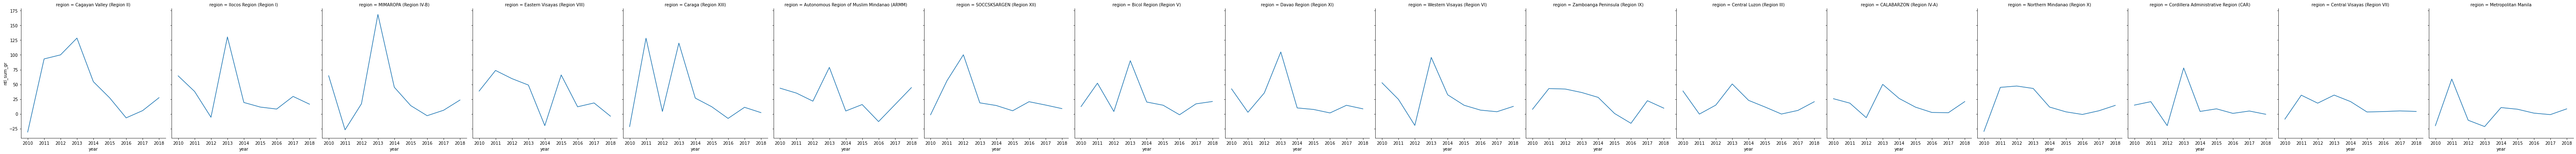

In [223]:
df = df_ntl_p2[df_ntl_p2['region'].isin(top_ave_ntl_gr_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='ntl_sum_gr', col='region', kind='line', 
            col_order=top_ave_ntl_gr_p2.index)

## Land Cover

In [96]:
df_lc = pd.read_csv(path + "data/scratch/data.csv", index_col=False,
                    usecols=['YEAR', 'REGION', 'ZONE_CODE'] + ['LC_C' + str(i) for i in [10, 12, 14]], 
                    parse_dates=['YEAR'])
df_lc.columns = [i.lower() for i in df_lc.columns]

In [97]:
df_lc = df_lc.assign(lc_c10_c12 = lambda x: x.lc_c10 + x.lc_c12,
                     lc_c12_c14 = lambda x: x.lc_c12 + x.lc_c14,
                     lc_c10_c12_c14 = lambda x: x.lc_c10 + x.lc_c12 + x.lc_c14,
                     log_lc_c10 = lambda x: np.log(x.lc_c10), 
                     log_lc_c12 = lambda x: np.log(x.lc_c12),
                     log_lc_c14 = lambda x: np.log(x.lc_c14),
                     log_lc_c10_c12 = lambda x: np.log(x.lc_c10_c12),
                     log_lc_c12_c14 = lambda x: np.log(x.lc_c12_c14),
                     log_lc_c10_c12_c14 = lambda x: np.log(x.lc_c10_c12_c14))

C:\Users\Jesson Pagaduan\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log



In [98]:
lc_growth = pd.DataFrame(df_lc.set_index(['region', 'year']).groupby('zone_code').pct_change() * 100).reset_index()

In [99]:
df_lc = df_lc.set_index(['region', 'year']).join(lc_growth.set_index(['region', 'year']), rsuffix='_gr').reset_index()

In [100]:
df_lc.drop(columns=['log_lc_c10_gr', 'log_lc_c12_gr', 'log_lc_c14_gr', 'log_lc_c10_c12_gr',
                    'log_lc_c12_c14_gr', 'log_lc_c10_c12_c14_gr'], 
           inplace=True)

### Land cover area

#### Full sample: 2001-2018

In [101]:
#  19-year average grasslands area per region, highest to lowest
top_ave_lc_c10 = df_lc.groupby(['region']).mean().sort_values(by='log_lc_c10', ascending=False)[['zone_code', 'log_lc_c10']]
top_ave_lc_c10

zone_code  log_lc_c10
region                                                            
MIMAROPA (Region IV-B)                              12   21.644748
Cagayan Valley (Region II)                           4   20.952906
Caraga (Region XIII)                                 5   20.909837
Bicol Region (Region V)                              2   20.849889
Central Luzon (Region III)                           6   20.814022
Eastern Visayas (Region VIII)                       10   20.790639
Western Visayas (Region VI)                         16   20.627306
CALABARZON (Region IV-A)                             3   20.604708
Ilocos Region (Region I)                            11   20.528390
Davao Region (Region XI)                             9   20.500259
Zamboanga Peninsula (Region IX)                     17   20.135470
SOCCSKSARGEN (Region XII)                           15   20.043942
Autonomous Region of Muslim Mindanao (ARMM)          1   19.933621
Northern Mindanao (Region X)                        14   19.771607
Cordillera Administrative Region (CAR)               8   19.660036
Central Visayas (Region VII)                         7   19.649877
Metropolitan Manila                                 13   15.398386

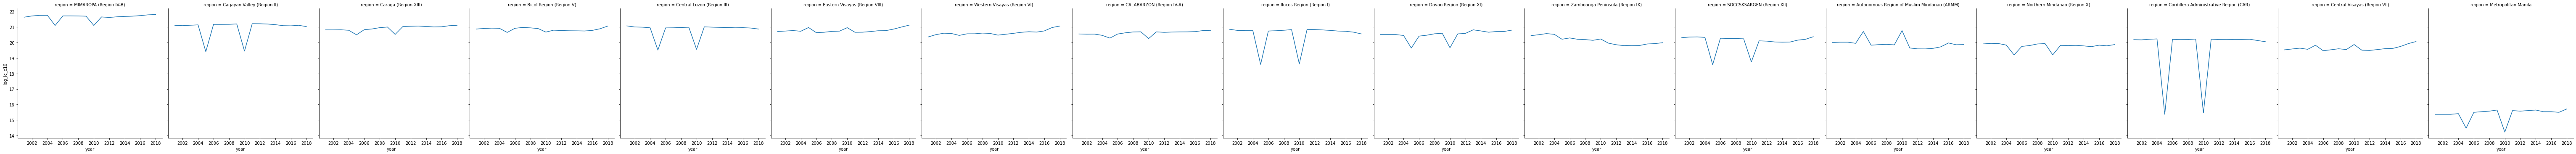

In [102]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c10.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10', col='region', kind='line', 
            col_order=top_ave_lc_c10.index)

In [103]:
#  19-year average croplands area per region, highest to lowest
top_ave_lc_c12 = df_lc.groupby(['region']).mean().sort_values(by='log_lc_c12', ascending=False)[['zone_code', 'log_lc_c12']]
top_ave_lc_c12

zone_code  log_lc_c12
region                                                            
Central Luzon (Region III)                           6   22.221077
Ilocos Region (Region I)                            11   21.352148
Cagayan Valley (Region II)                           4   21.334465
CALABARZON (Region IV-A)                             3   20.959446
Western Visayas (Region VI)                         16   20.925559
MIMAROPA (Region IV-B)                              12   20.515419
SOCCSKSARGEN (Region XII)                           15   20.264712
Bicol Region (Region V)                              2   20.202070
Davao Region (Region XI)                             9   20.199871
Northern Mindanao (Region X)                        14   20.167881
Zamboanga Peninsula (Region IX)                     17   19.943163
Eastern Visayas (Region VIII)                       10   19.465392
Caraga (Region XIII)                                 5   19.456817
Cordillera Administrative Region (CAR)               8   19.308762
Autonomous Region of Muslim Mindanao (ARMM)          1   18.942887
Central Visayas (Region VII)                         7   18.470737
Metropolitan Manila                                 13   16.102868

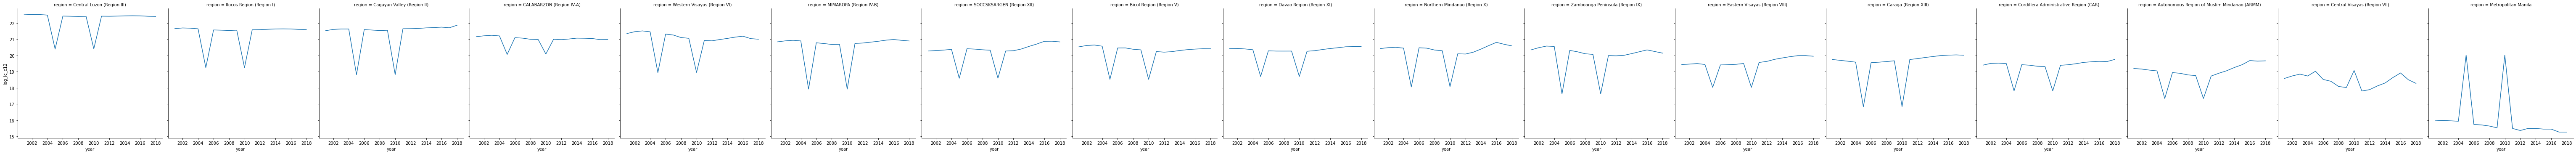

In [104]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c12.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c12', col='region', kind='line', 
            col_order=top_ave_lc_c12.index)

In [105]:
#  19-year average vegetation area per region, highest to lowest
top_ave_lc_c14 = df_lc.groupby(['region']).mean().sort_values(by='log_lc_c14', ascending=False)[['zone_code', 'log_lc_c14']]
top_ave_lc_c14

zone_code  log_lc_c14
region                                                            
Autonomous Region of Muslim Mindanao (ARMM)          1   20.688117
Cagayan Valley (Region II)                           4   20.414982
Central Visayas (Region VII)                         7   19.442802
MIMAROPA (Region IV-B)                              12   18.857664
Ilocos Region (Region I)                            11        -inf
Western Visayas (Region VI)                         16        -inf
SOCCSKSARGEN (Region XII)                           15        -inf
Northern Mindanao (Region X)                        14        -inf
Metropolitan Manila                                 13        -inf
Davao Region (Region XI)                             9        -inf
Eastern Visayas (Region VIII)                       10        -inf
Bicol Region (Region V)                              2        -inf
Cordillera Administrative Region (CAR)               8        -inf
Central Luzon (Region III)                           6        -inf
Caraga (Region XIII)                                 5        -inf
CALABARZON (Region IV-A)                             3        -inf
Zamboanga Peninsula (Region IX)                     17        -inf

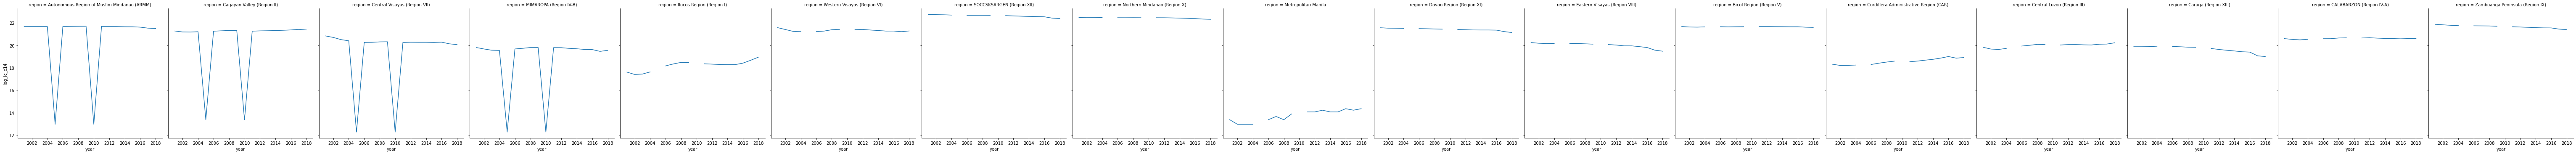

In [106]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c14.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c14', col='region', kind='line', 
            col_order=top_ave_lc_c14.index)

In [107]:
#  19-year average grasslands+croplands area per region, highest to lowest
top_ave_lc_c10_c12 = df_lc.groupby(['region']).mean().sort_values(by='log_lc_c10_c12', ascending=False)[['zone_code', 'log_lc_c10_c12']]
top_ave_lc_c10_c12

zone_code  log_lc_c10_c12
region                                                                
Central Luzon (Region III)                           6       22.443428
MIMAROPA (Region IV-B)                              12       21.960060
Cagayan Valley (Region II)                           4       21.871669
Ilocos Region (Region I)                            11       21.717014
Western Visayas (Region VI)                         16       21.538948
CALABARZON (Region IV-A)                             3       21.498528
Bicol Region (Region V)                              2       21.297985
Caraga (Region XIII)                                 5       21.152806
Davao Region (Region XI)                             9       21.061827
Eastern Visayas (Region VIII)                       10       21.048503
SOCCSKSARGEN (Region XII)                           15       20.862328
Zamboanga Peninsula (Region IX)                     17       20.812284
Northern Mindanao (Region X)                        14       20.722220
Autonomous Region of Muslim Mindanao (ARMM)          1       20.308291
Cordillera Administrative Region (CAR)               8       20.298490
Central Visayas (Region VII)                         7       19.928433
Metropolitan Manila                                 13       16.695029

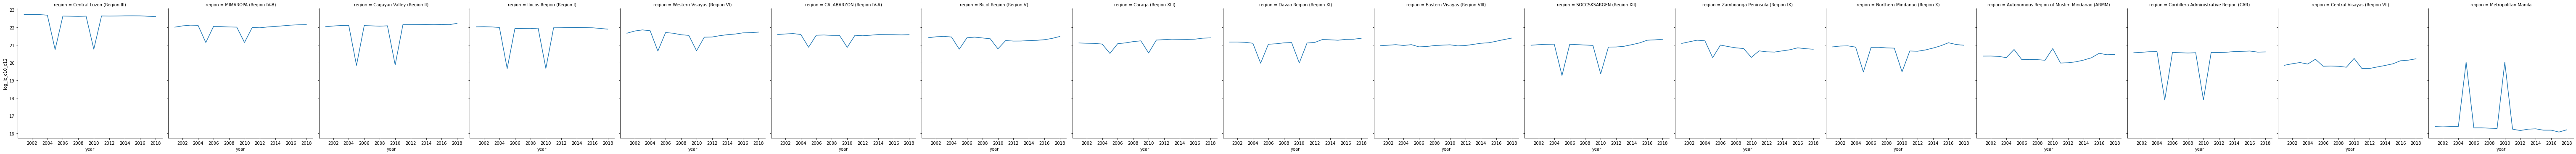

In [108]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c10_c12.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10_c12', col='region', kind='line', 
            col_order=top_ave_lc_c10_c12.index)

In [109]:
#  19-year average croplands+vegetation area per region, highest to lowest
top_ave_lc_c12_c14 = df_lc.groupby(['region']).mean().sort_values(by='log_lc_c12_c14', ascending=False)[['zone_code', 'log_lc_c12_c14']]
top_ave_lc_c12_c14

zone_code  log_lc_c12_c14
region                                                                
Central Luzon (Region III)                           6       22.294350
SOCCSKSARGEN (Region XII)                           15       22.275882
Northern Mindanao (Region X)                        14       22.062732
Cagayan Valley (Region II)                           4       21.808265
Western Visayas (Region VI)                         16       21.619526
Bicol Region (Region V)                              2       21.527472
Zamboanga Peninsula (Region IX)                     17       21.403489
CALABARZON (Region IV-A)                             3       21.394842
Davao Region (Region XI)                             9       21.386684
Ilocos Region (Region I)                            11       21.383475
Autonomous Region of Muslim Mindanao (ARMM)          1       21.249428
MIMAROPA (Region IV-B)                              12       20.761280
Central Visayas (Region VII)                         7       20.319454
Eastern Visayas (Region VIII)                       10       20.274819
Caraga (Region XIII)                                 5       20.033914
Cordillera Administrative Region (CAR)               8       19.607315
Metropolitan Manila                                 13       16.256740

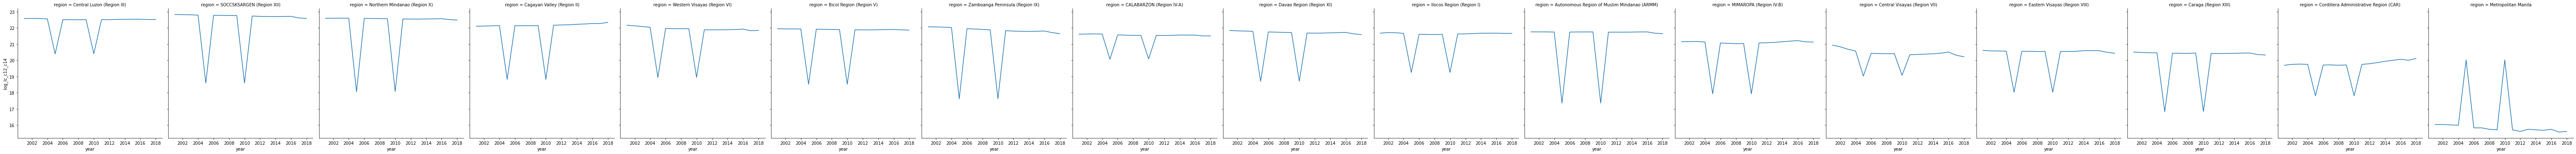

In [110]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c12_c14.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c12_c14', col='region', kind='line', 
            col_order=top_ave_lc_c12_c14.index)

In [111]:
#  19-year average agri area per region, highest to lowest
top_ave_lc_c10_c12_c14 = df_lc.groupby(['region']).mean().sort_values(by='log_lc_c10_c12_c14', ascending=False)[['zone_code', 'log_lc_c10_c12_c14']]
top_ave_lc_c10_c12_c14

zone_code  log_lc_c10_c12_c14
region                                                                    
Central Luzon (Region III)                           6           22.503487
SOCCSKSARGEN (Region XII)                           15           22.426146
Northern Mindanao (Region X)                        14           22.276902
Cagayan Valley (Region II)                           4           22.194468
Bicol Region (Region V)                              2           22.049681
MIMAROPA (Region IV-B)                              12           22.039452
Western Visayas (Region VI)                         16           22.028204
Zamboanga Peninsula (Region IX)                     17           21.843970
CALABARZON (Region IV-A)                             3           21.784446
Davao Region (Region XI)                             9           21.783088
Autonomous Region of Muslim Mindanao (ARMM)          1           21.753745
Ilocos Region (Region I)                            11           21.739083
Caraga (Region XIII)                                 5           21.327579
Eastern Visayas (Region VIII)                       10           21.325286
Central Visayas (Region VII)                         7           20.772515
Cordillera Administrative Region (CAR)               8           20.410224
Metropolitan Manila                                 13           16.773059

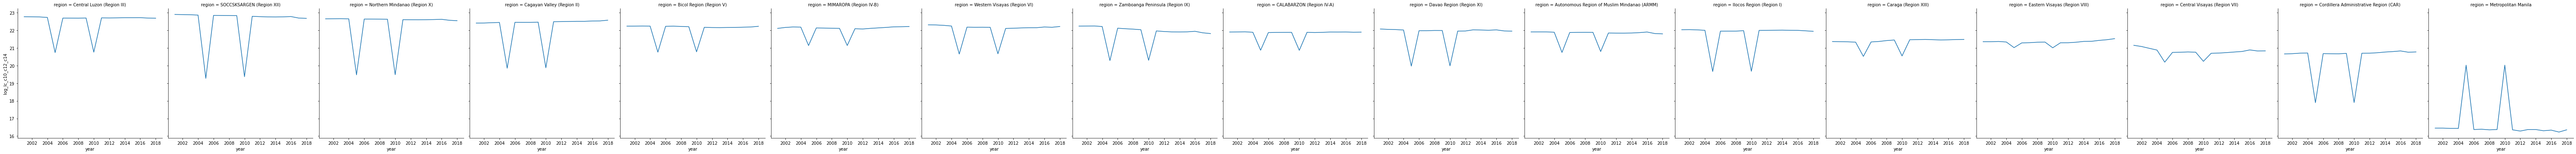

In [112]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c10_c12_c14.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10_c12_c14', col='region', kind='line', 
            col_order=top_ave_lc_c10_c12_c14.index)

#### Sample: 2000-2008

In [186]:
df_lc_p1 = df_lc[df_lc['year'] < '2009-01-01']

In [187]:
#  Average grasslands area per region, highest to lowest
top_ave_lc_c10_p1 = df_lc_p1.groupby(['region']).mean().sort_values(by='log_lc_c10', ascending=False)[['zone_code', 'log_lc_c10']]
top_ave_lc_c10_p1

zone_code  log_lc_c10
region                                                            
MIMAROPA (Region IV-B)                              12   21.641610
Cagayan Valley (Region II)                           4   20.925572
Bicol Region (Region V)                              2   20.891923
Caraga (Region XIII)                                 5   20.802962
Central Luzon (Region III)                           6   20.802055
Eastern Visayas (Region VIII)                       10   20.744980
Western Visayas (Region VI)                         16   20.533772
CALABARZON (Region IV-A)                             3   20.532699
Ilocos Region (Region I)                            11   20.508925
Davao Region (Region XI)                             9   20.389138
Zamboanga Peninsula (Region IX)                     17   20.372816
SOCCSKSARGEN (Region XII)                           15   20.093602
Autonomous Region of Muslim Mindanao (ARMM)          1   20.037468
Northern Mindanao (Region X)                        14   19.787255
Cordillera Administrative Region (CAR)               8   19.597683
Central Visayas (Region VII)                         7   19.594081
Metropolitan Manila                                 13   15.324136

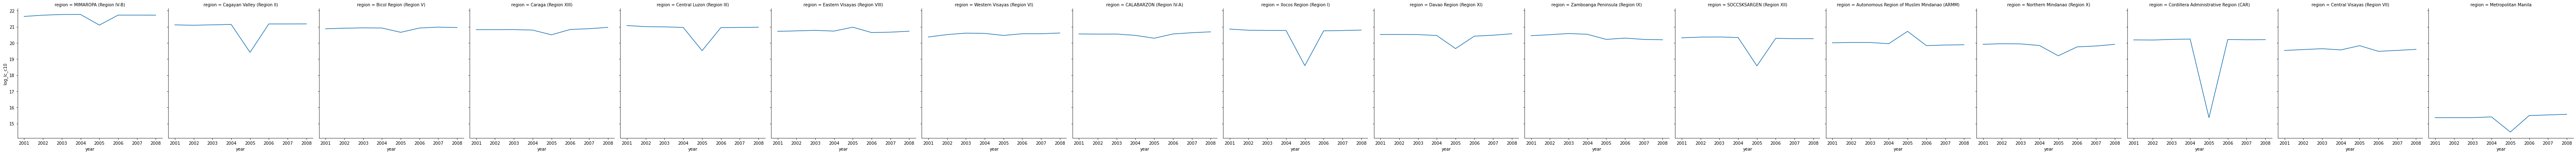

In [188]:
df = df_lc_p1[df_lc_p1['region'].isin(top_ave_lc_c10_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10', col='region', kind='line', 
            col_order=top_ave_lc_c10_p1.index)

In [189]:
#  Average croplands area per region, highest to lowest
top_ave_lc_c12_p1 = df_lc_p1.groupby(['region']).mean().sort_values(by='log_lc_c12', ascending=False)[['zone_code', 'log_lc_c12']]
top_ave_lc_c12_p1

zone_code  log_lc_c12
region                                                            
Central Luzon (Region III)                           6   22.214036
Ilocos Region (Region I)                            11   21.326496
Cagayan Valley (Region II)                           4   21.240952
Western Visayas (Region VI)                         16   21.052455
CALABARZON (Region IV-A)                             3   21.007013
MIMAROPA (Region IV-B)                              12   20.462696
Bicol Region (Region V)                              2   20.274781
Northern Mindanao (Region X)                        14   20.147510
Davao Region (Region XI)                             9   20.143571
SOCCSKSARGEN (Region XII)                           15   20.129657
Zamboanga Peninsula (Region IX)                     17   20.028740
Caraga (Region XIII)                                 5   19.284286
Eastern Visayas (Region VIII)                       10   19.272154
Cordillera Administrative Region (CAR)               8   19.239903
Autonomous Region of Muslim Mindanao (ARMM)          1   18.811220
Central Visayas (Region VII)                         7   18.616824
Metropolitan Manila                                 13   16.372831

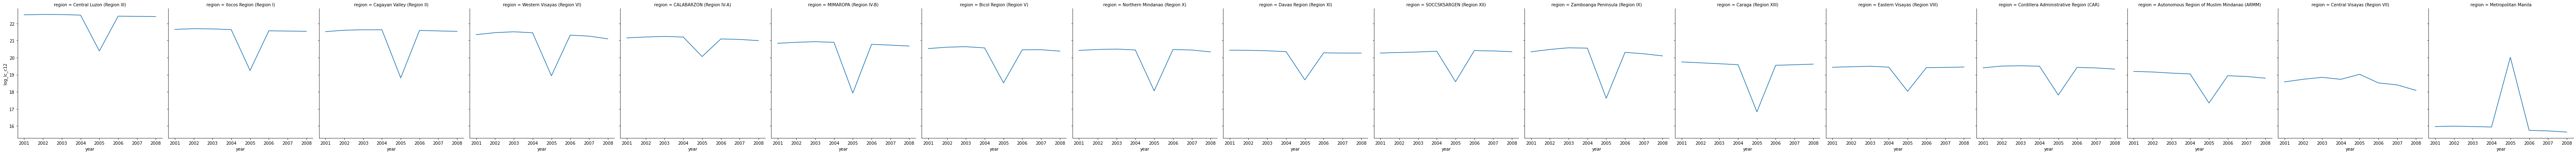

In [190]:
df = df_lc_p1[df_lc_p1['region'].isin(top_ave_lc_c12_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c12', col='region', kind='line', 
            col_order=top_ave_lc_c12_p1.index)

In [191]:
#  Average vegetation area per region, highest to lowest
top_ave_lc_c14_p1 = df_lc_p1.groupby(['region']).mean().sort_values(by='log_lc_c14', ascending=False)[['zone_code', 'log_lc_c14']]
top_ave_lc_c14_p1

zone_code  log_lc_c14
region                                                            
Autonomous Region of Muslim Mindanao (ARMM)          1   20.592738
Cagayan Valley (Region II)                           4   20.263519
Central Visayas (Region VII)                         7   19.445583
MIMAROPA (Region IV-B)                              12   18.760215
Ilocos Region (Region I)                            11        -inf
Western Visayas (Region VI)                         16        -inf
SOCCSKSARGEN (Region XII)                           15        -inf
Northern Mindanao (Region X)                        14        -inf
Metropolitan Manila                                 13        -inf
Davao Region (Region XI)                             9        -inf
Eastern Visayas (Region VIII)                       10        -inf
Bicol Region (Region V)                              2        -inf
Cordillera Administrative Region (CAR)               8        -inf
Central Luzon (Region III)                           6        -inf
Caraga (Region XIII)                                 5        -inf
CALABARZON (Region IV-A)                             3        -inf
Zamboanga Peninsula (Region IX)                     17        -inf

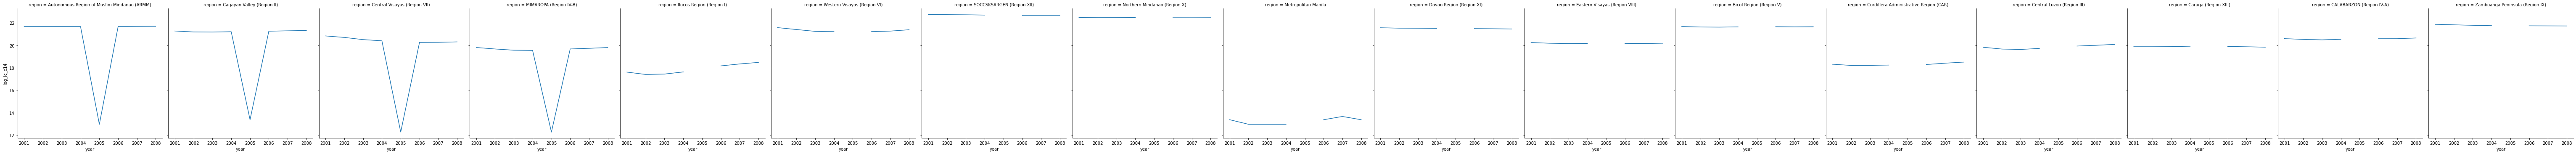

In [192]:
df = df_lc_p1[df_lc_p1['region'].isin(top_ave_lc_c14_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c14', col='region', kind='line', 
            col_order=top_ave_lc_c14_p1.index)

In [193]:
#  19-year average grasslands+croplands area per region, highest to lowest
top_ave_lc_c10_c12_p1 = df_lc_p1.groupby(['region']).mean().sort_values(by='log_lc_c10_c12', ascending=False)[['zone_code', 'log_lc_c10_c12']]
top_ave_lc_c10_c12_p1

zone_code  log_lc_c10_c12
region                                                                
Central Luzon (Region III)                           6       22.435709
MIMAROPA (Region IV-B)                              12       21.947492
Cagayan Valley (Region II)                           4       21.803726
Ilocos Region (Region I)                            11       21.692884
Western Visayas (Region VI)                         16       21.591765
CALABARZON (Region IV-A)                             3       21.501316
Bicol Region (Region V)                              2       21.355553
Caraga (Region XIII)                                 5       21.034803
Zamboanga Peninsula (Region IX)                     17       20.978577
Davao Region (Region XI)                             9       20.975843
Eastern Visayas (Region VIII)                       10       20.969312
SOCCSKSARGEN (Region XII)                           15       20.805581
Northern Mindanao (Region X)                        14       20.716389
Autonomous Region of Muslim Mindanao (ARMM)          1       20.335778
Cordillera Administrative Region (CAR)               8       20.250395
Central Visayas (Region VII)                         7       19.918395
Metropolitan Manila                                 13       16.825077

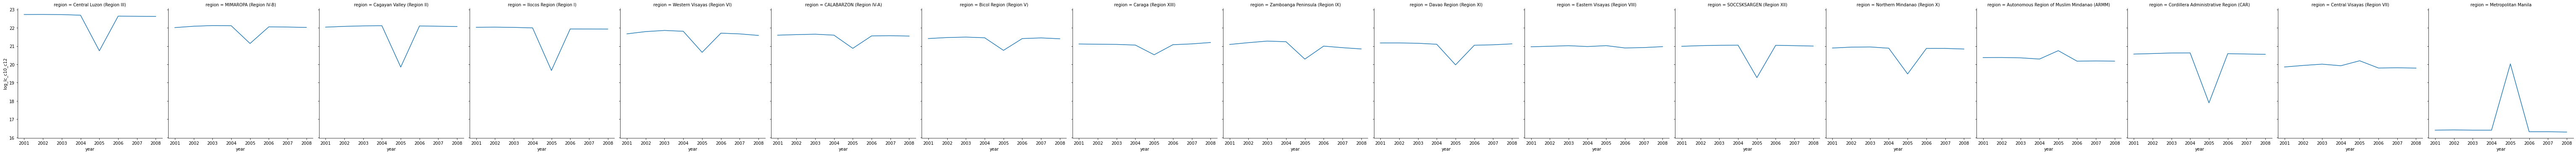

In [194]:
df = df_lc_p1[df_lc_p1['region'].isin(top_ave_lc_c10_c12_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10_c12', col='region', kind='line', 
            col_order=top_ave_lc_c10_c12_p1.index)

In [195]:
#  Average croplands+vegetation area per region, highest to lowest
top_ave_lc_c12_c14_p1 = df_lc_p1.groupby(['region']).mean().sort_values(by='log_lc_c12_c14', ascending=False)[['zone_code', 'log_lc_c12_c14']]
top_ave_lc_c12_c14_p1

zone_code  log_lc_c12_c14
region                                                                
Central Luzon (Region III)                           6       22.275841
SOCCSKSARGEN (Region XII)                           15       22.268721
Northern Mindanao (Region X)                        14       22.023211
Cagayan Valley (Region II)                           4       21.712800
Western Visayas (Region VI)                         16       21.653569
Bicol Region (Region V)                              2       21.502033
Zamboanga Peninsula (Region IX)                     17       21.449680
CALABARZON (Region IV-A)                             3       21.400257
Davao Region (Region XI)                             9       21.395743
Ilocos Region (Region I)                            11       21.349088
Autonomous Region of Muslim Mindanao (ARMM)          1       21.200893
MIMAROPA (Region IV-B)                              12       20.708566
Central Visayas (Region VII)                         7       20.412683
Eastern Visayas (Region VIII)                       10       20.251974
Caraga (Region XIII)                                 5       20.005856
Cordillera Administrative Region (CAR)               8       19.486974
Metropolitan Manila                                 13       16.438851

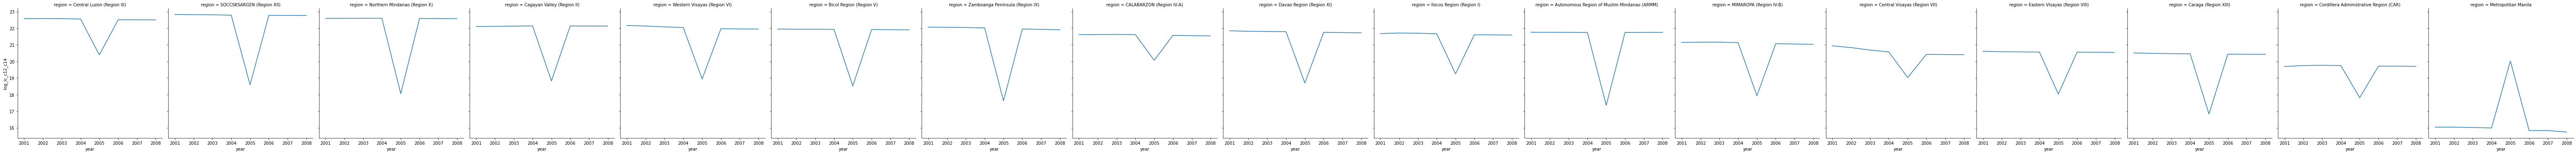

In [196]:
df = df_lc_p1[df_lc_p1['region'].isin(top_ave_lc_c12_c14_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c12_c14', col='region', kind='line', 
            col_order=top_ave_lc_c12_c14_p1.index)

In [197]:
#  Average agri area per region, highest to lowest
top_ave_lc_c10_c12_c14_p1 = df_lc_p1.groupby(['region']).mean().sort_values(by='log_lc_c10_c12_c14', ascending=False)[['zone_code', 'log_lc_c10_c12_c14']]
top_ave_lc_c10_c12_c14_p1

zone_code  log_lc_c10_c12_c14
region                                                                    
Central Luzon (Region III)                           6           22.486404
SOCCSKSARGEN (Region XII)                           15           22.424499
Northern Mindanao (Region X)                        14           22.256677
Cagayan Valley (Region II)                           4           22.119647
Bicol Region (Region V)                              2           22.056144
Western Visayas (Region VI)                         16           22.046524
MIMAROPA (Region IV-B)                              12           22.025863
Zamboanga Peninsula (Region IX)                     17           21.943970
CALABARZON (Region IV-A)                             3           21.771028
Davao Region (Region XI)                             9           21.768778
Autonomous Region of Muslim Mindanao (ARMM)          1           21.757823
Ilocos Region (Region I)                            11           21.708626
Eastern Visayas (Region VIII)                       10           21.297565
Caraga (Region XIII)                                 5           21.260209
Central Visayas (Region VII)                         7           20.824684
Cordillera Administrative Region (CAR)               8           20.336731
Metropolitan Manila                                 13           16.864240

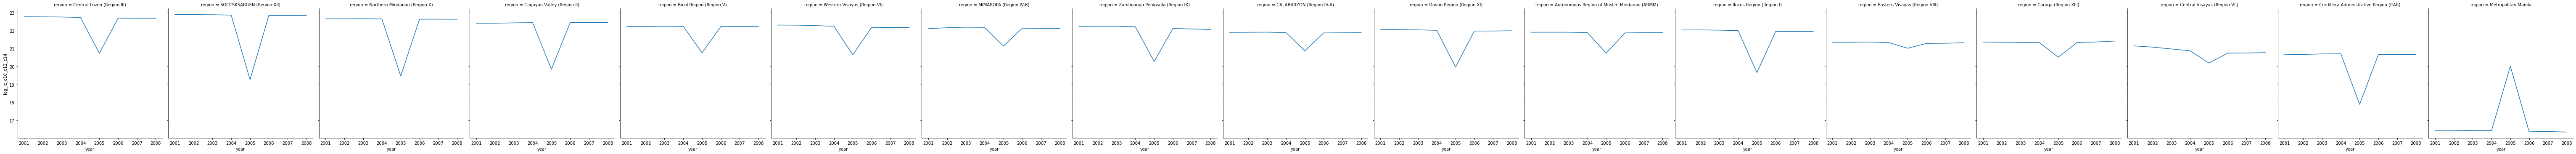

In [198]:
df = df_lc_p1[df_lc_p1['region'].isin(top_ave_lc_c10_c12_c14_p1.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10_c12_c14', col='region', kind='line', 
            col_order=top_ave_lc_c10_c12_c14_p1.index)

#### Sample: 2009-2018

In [199]:
df_lc_p2 = df_lc[df_lc['year'] >= '2009-01-01']

In [200]:
#  Average grasslands area per region, highest to lowest
top_ave_lc_c10_p2 = df_lc_p2.groupby(['region']).mean().sort_values(by='log_lc_c10', ascending=False)[['zone_code', 'log_lc_c10']]
top_ave_lc_c10_p2

zone_code  log_lc_c10
region                                                            
MIMAROPA (Region IV-B)                              12   21.647258
Caraga (Region XIII)                                 5   20.995336
Cagayan Valley (Region II)                           4   20.974772
Eastern Visayas (Region VIII)                       10   20.827167
Central Luzon (Region III)                           6   20.823596
Bicol Region (Region V)                              2   20.816261
Western Visayas (Region VI)                         16   20.702134
CALABARZON (Region IV-A)                             3   20.662315
Davao Region (Region XI)                             9   20.589155
Ilocos Region (Region I)                            11   20.543961
SOCCSKSARGEN (Region XII)                           15   20.004215
Zamboanga Peninsula (Region IX)                     17   19.945592
Autonomous Region of Muslim Mindanao (ARMM)          1   19.850544
Northern Mindanao (Region X)                        14   19.759089
Cordillera Administrative Region (CAR)               8   19.709918
Central Visayas (Region VII)                         7   19.694515
Metropolitan Manila                                 13   15.457785

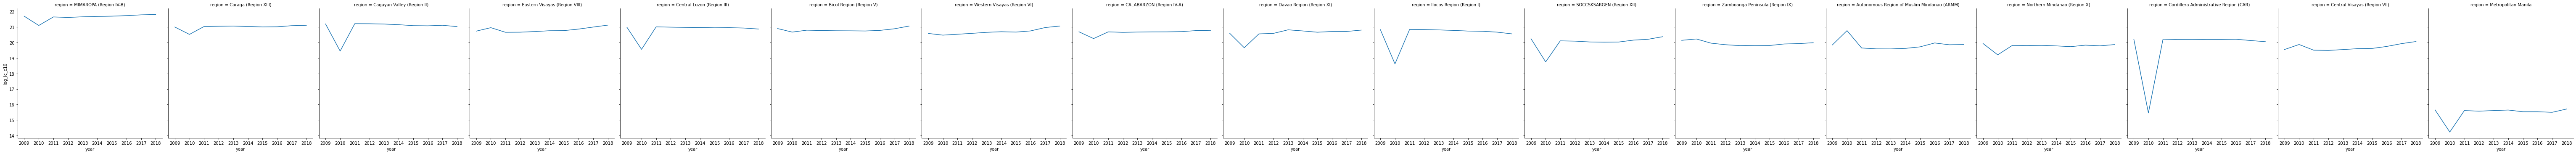

In [201]:
df = df_lc_p2[df_lc_p2['region'].isin(top_ave_lc_c10_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10', col='region', kind='line', 
            col_order=top_ave_lc_c10_p2.index)

In [202]:
#  Average croplands area per region, highest to lowest
top_ave_lc_c12_p2 = df_lc_p2.groupby(['region']).mean().sort_values(by='log_lc_c12', ascending=False)[['zone_code', 'log_lc_c12']]
top_ave_lc_c12_p2

zone_code  log_lc_c12
region                                                            
Central Luzon (Region III)                           6   22.226709
Cagayan Valley (Region II)                           4   21.409275
Ilocos Region (Region I)                            11   21.372670
CALABARZON (Region IV-A)                             3   20.921391
Western Visayas (Region VI)                         16   20.824043
MIMAROPA (Region IV-B)                              12   20.557597
SOCCSKSARGEN (Region XII)                           15   20.372755
Davao Region (Region XI)                             9   20.244911
Northern Mindanao (Region X)                        14   20.184179
Bicol Region (Region V)                              2   20.143902
Zamboanga Peninsula (Region IX)                     17   19.874701
Eastern Visayas (Region VIII)                       10   19.619983
Caraga (Region XIII)                                 5   19.594842
Cordillera Administrative Region (CAR)               8   19.363849
Autonomous Region of Muslim Mindanao (ARMM)          1   19.048220
Central Visayas (Region VII)                         7   18.353866
Metropolitan Manila                                 13   15.886898

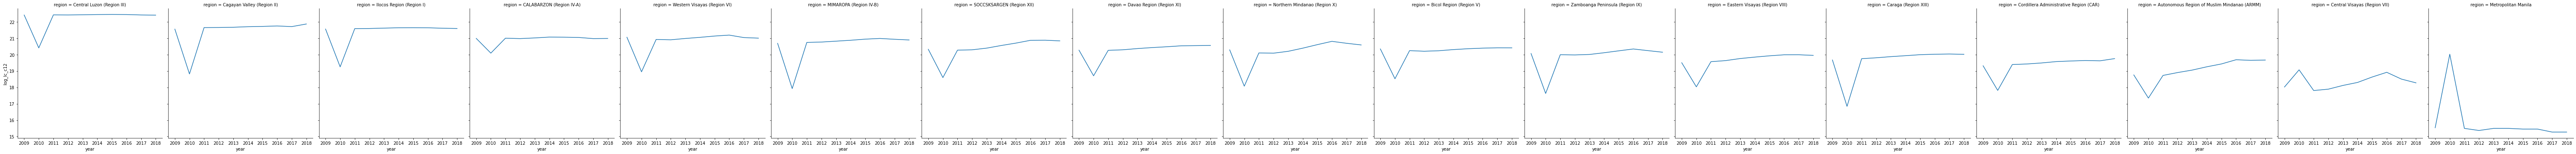

In [203]:
df = df_lc_p2[df_lc_p2['region'].isin(top_ave_lc_c12_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c12', col='region', kind='line', 
            col_order=top_ave_lc_c12_p2.index)

In [204]:
#  Average vegetation area per region, highest to lowest
top_ave_lc_c14_p2 = df_lc_p2.groupby(['region']).mean().sort_values(by='log_lc_c14', ascending=False)[['zone_code', 'log_lc_c14']]
top_ave_lc_c14_p2

zone_code  log_lc_c14
region                                                            
Autonomous Region of Muslim Mindanao (ARMM)          1   20.764420
Cagayan Valley (Region II)                           4   20.536153
Central Visayas (Region VII)                         7   19.440577
MIMAROPA (Region IV-B)                              12   18.935623
Ilocos Region (Region I)                            11        -inf
Western Visayas (Region VI)                         16        -inf
SOCCSKSARGEN (Region XII)                           15        -inf
Northern Mindanao (Region X)                        14        -inf
Metropolitan Manila                                 13        -inf
Davao Region (Region XI)                             9        -inf
Eastern Visayas (Region VIII)                       10        -inf
Bicol Region (Region V)                              2        -inf
Cordillera Administrative Region (CAR)               8        -inf
Central Luzon (Region III)                           6        -inf
Caraga (Region XIII)                                 5        -inf
CALABARZON (Region IV-A)                             3        -inf
Zamboanga Peninsula (Region IX)                     17        -inf

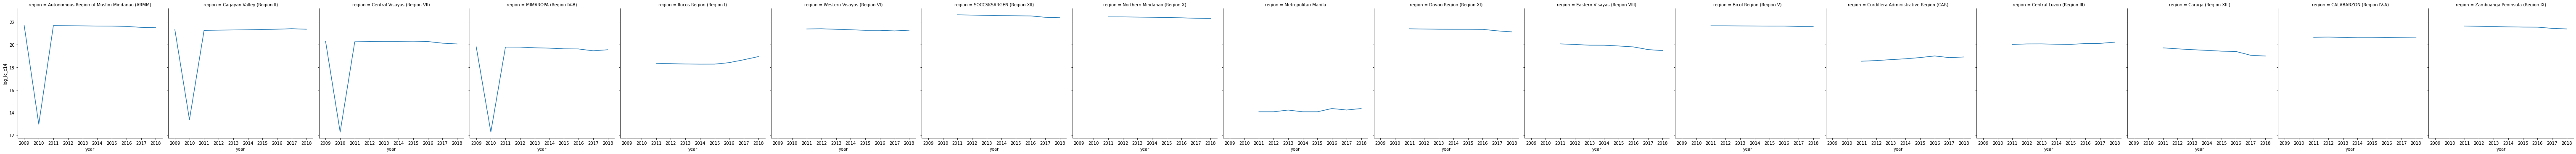

In [205]:
df = df_lc_p2[df_lc_p2['region'].isin(top_ave_lc_c14_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c14', col='region', kind='line', 
            col_order=top_ave_lc_c14_p2.index)

In [206]:
#  Average grasslands+croplands area per region, highest to lowest
top_ave_lc_c10_c12_p2 = df_lc_p2.groupby(['region']).mean().sort_values(by='log_lc_c10_c12', ascending=False)[['zone_code', 'log_lc_c10_c12']]
top_ave_lc_c10_c12_p2

zone_code  log_lc_c10_c12
region                                                                
Central Luzon (Region III)                           6       22.449603
MIMAROPA (Region IV-B)                              12       21.970115
Cagayan Valley (Region II)                           4       21.926023
Ilocos Region (Region I)                            11       21.736318
Western Visayas (Region VI)                         16       21.496694
CALABARZON (Region IV-A)                             3       21.496298
Bicol Region (Region V)                              2       21.251930
Caraga (Region XIII)                                 5       21.247209
Davao Region (Region XI)                             9       21.130614
Eastern Visayas (Region VIII)                       10       21.111856
SOCCSKSARGEN (Region XII)                           15       20.907726
Northern Mindanao (Region X)                        14       20.726885
Zamboanga Peninsula (Region IX)                     17       20.679249
Cordillera Administrative Region (CAR)               8       20.336965
Autonomous Region of Muslim Mindanao (ARMM)          1       20.286301
Central Visayas (Region VII)                         7       19.936463
Metropolitan Manila                                 13       16.590992

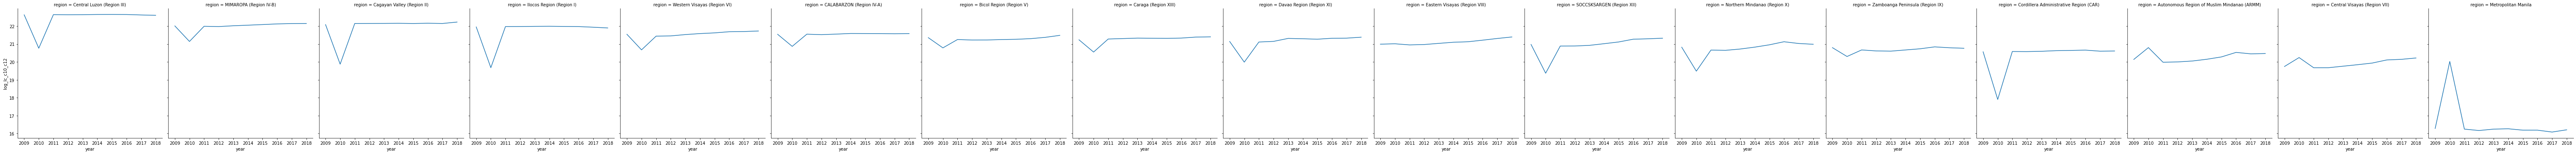

In [207]:
df = df_lc_p2[df_lc_p2['region'].isin(top_ave_lc_c10_c12_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10_c12', col='region', kind='line', 
            col_order=top_ave_lc_c10_c12_p2.index)

In [208]:
#  19-year average croplands+vegetation area per region, highest to lowest
top_ave_lc_c12_c14_p2 = df_lc_p2.groupby(['region']).mean().sort_values(by='log_lc_c12_c14', ascending=False)[['zone_code', 'log_lc_c12_c14']]
top_ave_lc_c12_c14_p2

zone_code  log_lc_c12_c14
region                                                                
Central Luzon (Region III)                           6       22.309158
SOCCSKSARGEN (Region XII)                           15       22.281610
Northern Mindanao (Region X)                        14       22.094350
Cagayan Valley (Region II)                           4       21.884638
Western Visayas (Region VI)                         16       21.592292
Bicol Region (Region V)                              2       21.547823
Ilocos Region (Region I)                            11       21.410984
CALABARZON (Region IV-A)                             3       21.390509
Davao Region (Region XI)                             9       21.379437
Zamboanga Peninsula (Region IX)                     17       21.366537
Autonomous Region of Muslim Mindanao (ARMM)          1       21.288256
MIMAROPA (Region IV-B)                              12       20.803451
Eastern Visayas (Region VIII)                       10       20.293095
Central Visayas (Region VII)                         7       20.244872
Caraga (Region XIII)                                 5       20.056360
Cordillera Administrative Region (CAR)               8       19.703587
Metropolitan Manila                                 13       16.111052

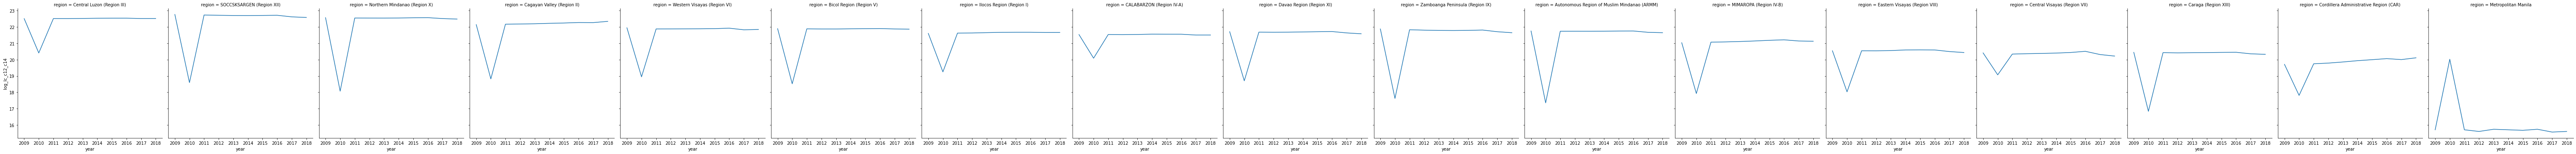

In [209]:
df = df_lc_p2[df_lc_p2['region'].isin(top_ave_lc_c12_c14_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c12_c14', col='region', kind='line', 
            col_order=top_ave_lc_c12_c14_p2.index)

In [210]:
# Average agri area per region, highest to lowest
top_ave_lc_c10_c12_c14_p2 = df_lc_p2.groupby(['region']).mean().sort_values(by='log_lc_c10_c12_c14', ascending=False)[['zone_code', 'log_lc_c10_c12_c14']]
top_ave_lc_c10_c12_c14_p2

zone_code  log_lc_c10_c12_c14
region                                                                    
Central Luzon (Region III)                           6           22.517153
SOCCSKSARGEN (Region XII)                           15           22.427463
Northern Mindanao (Region X)                        14           22.293081
Cagayan Valley (Region II)                           4           22.254325
MIMAROPA (Region IV-B)                              12           22.050323
Bicol Region (Region V)                              2           22.044511
Western Visayas (Region VI)                         16           22.013548
CALABARZON (Region IV-A)                             3           21.795179
Davao Region (Region XI)                             9           21.794537
Zamboanga Peninsula (Region IX)                     17           21.763970
Ilocos Region (Region I)                            11           21.763450
Autonomous Region of Muslim Mindanao (ARMM)          1           21.750483
Caraga (Region XIII)                                 5           21.381475
Eastern Visayas (Region VIII)                       10           21.347463
Central Visayas (Region VII)                         7           20.730780
Cordillera Administrative Region (CAR)               8           20.469018
Metropolitan Manila                                 13           16.700114

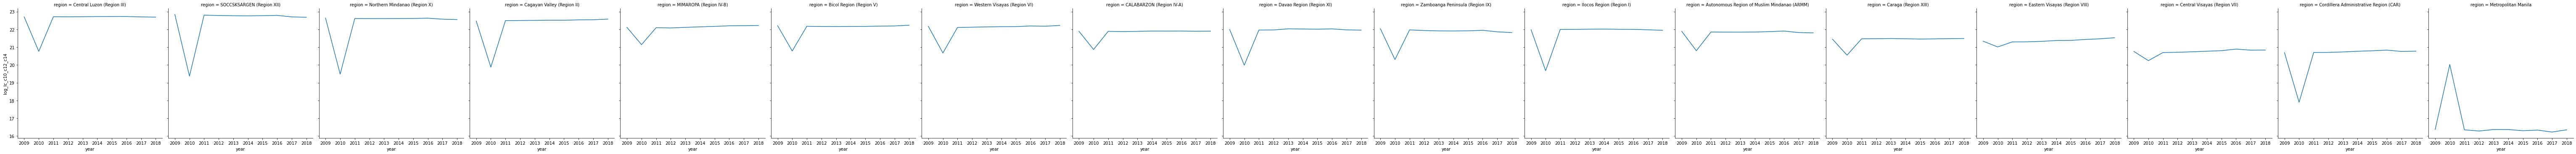

In [212]:
df = df_lc_p2[df_lc_p2['region'].isin(top_ave_lc_c10_c12_c14_p2.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='log_lc_c10_c12_c14', col='region', kind='line', 
            col_order=top_ave_lc_c10_c12_c14_p2.index)

### Land cover area growth

In [113]:
#  19-year average grasslands area growth per region, highest to lowest
top_ave_lc_c10_gr = df_lc.groupby(['region']).mean().sort_values(by='lc_c10_gr', ascending=False)[['zone_code', 'lc_c10_gr']]
top_ave_lc_c10_gr

zone_code    lc_c10_gr
region                                                             
Cordillera Administrative Region (CAR)               8  1410.129872
Ilocos Region (Region I)                            11    81.138997
Cagayan Valley (Region II)                           4    46.507727
SOCCSKSARGEN (Region XII)                           15    35.601720
Central Luzon (Region III)                           6    27.710026
Metropolitan Manila                                 13    22.021052
Davao Region (Region XI)                             9    10.944603
Autonomous Region of Muslim Mindanao (ARMM)          1     9.624963
MIMAROPA (Region IV-B)                              12     5.477401
Central Visayas (Region VII)                         7     4.701378
Western Visayas (Region VI)                         16     4.581763
Northern Mindanao (Region X)                        14     4.548102
Caraga (Region XIII)                                 5     3.864962
Eastern Visayas (Region VIII)                       10     3.459666
CALABARZON (Region IV-A)                             3     2.873682
Bicol Region (Region V)                              2     1.897042
Zamboanga Peninsula (Region IX)                     17    -2.032479

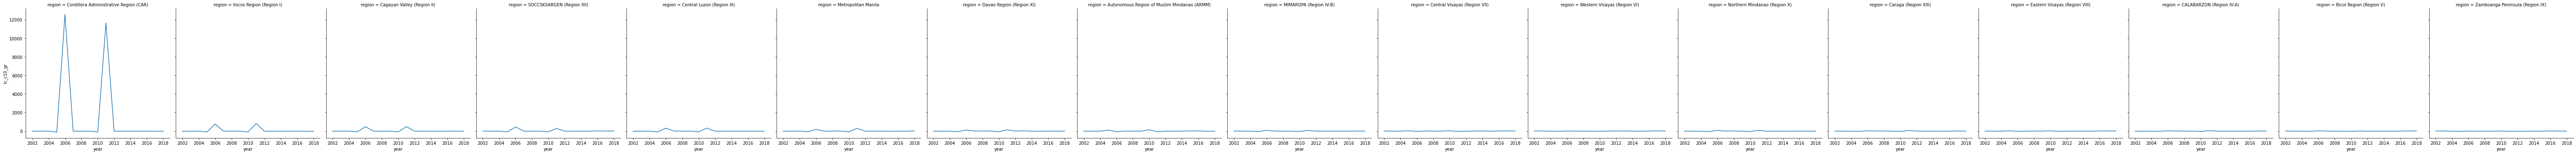

In [114]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c10_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='lc_c10_gr', col='region', kind='line', 
            col_order=top_ave_lc_c10_gr.index)

In [115]:
#  19-year average croplands area growth per region, highest to lowest
top_ave_lc_c12_gr = df_lc.groupby(['region']).mean().sort_values(by='lc_c12_gr', ascending=False)[['zone_code', 'lc_c12_gr']]
top_ave_lc_c12_gr

zone_code   lc_c12_gr
region                                                            
Metropolitan Manila                                 13  847.031394
MIMAROPA (Region IV-B)                              12  178.658979
Caraga (Region XIII)                                 5  176.083507
Cagayan Valley (Region II)                           4  173.258038
Zamboanga Peninsula (Region IX)                     17  127.279082
Ilocos Region (Region I)                            11   98.178531
Northern Mindanao (Region X)                        14   90.846893
Western Visayas (Region VI)                         16   83.407316
Central Luzon (Region III)                           6   66.896859
Bicol Region (Region V)                              2   52.381153
SOCCSKSARGEN (Region XII)                           15   50.002065
Cordillera Administrative Region (CAR)               8   39.192064
Davao Region (Region XI)                             9   36.523821
Autonomous Region of Muslim Mindanao (ARMM)          1   35.727517
Eastern Visayas (Region VIII)                       10   32.980738
CALABARZON (Region IV-A)                             3   11.505296
Central Visayas (Region VII)                         7    9.038277

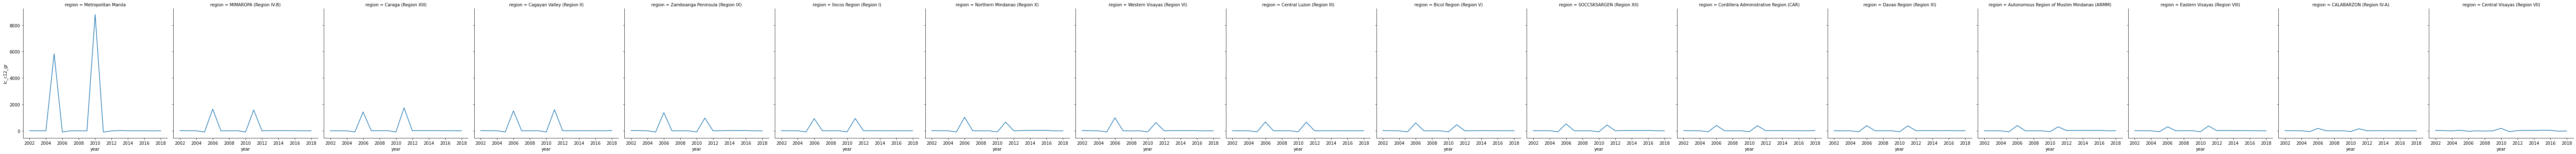

In [116]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c12_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='lc_c12_gr', col='region', kind='line', 
            col_order=top_ave_lc_c12_gr.index)

In [117]:
#  19-year average vegetation area growth per region, highest to lowest
top_ave_lc_c14_gr = df_lc.groupby(['region']).mean().sort_values(by='lc_c14_gr', ascending=False)[['zone_code', 'lc_c14_gr']]
top_ave_lc_c14_gr

zone_code     lc_c14_gr
region                                                              
Davao Region (Region XI)                             9           inf
Bicol Region (Region V)                              2           inf
Western Visayas (Region VI)                         16           inf
SOCCSKSARGEN (Region XII)                           15           inf
Northern Mindanao (Region X)                        14           inf
Metropolitan Manila                                 13           inf
Ilocos Region (Region I)                            11           inf
Eastern Visayas (Region VIII)                       10           inf
Zamboanga Peninsula (Region IX)                     17           inf
Cordillera Administrative Region (CAR)               8           inf
Central Luzon (Region III)                           6           inf
Caraga (Region XIII)                                 5           inf
CALABARZON (Region IV-A)                             3           inf
Autonomous Region of Muslim Mindanao (ARMM)          1  7.148728e+04
Central Visayas (Region VII)                         7  3.446159e+04
Cagayan Valley (Region II)                           4  3.125168e+04
MIMAROPA (Region IV-B)                              12  2.038634e+04

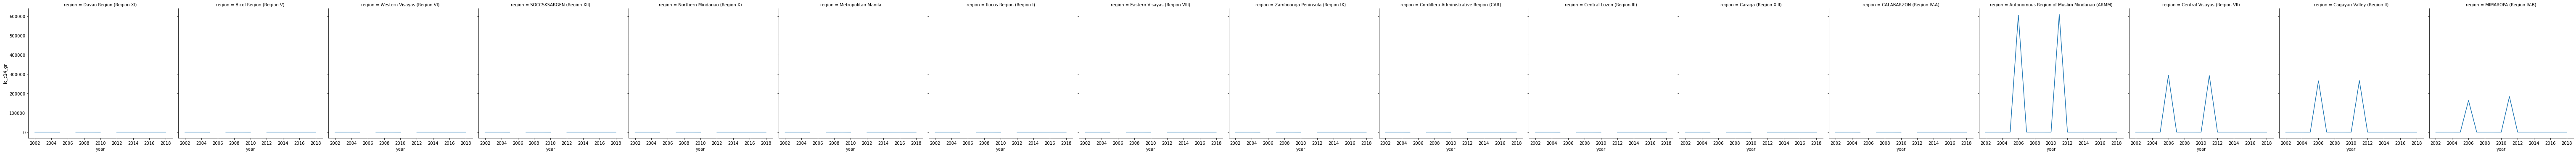

In [118]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c14_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='lc_c14_gr', col='region', kind='line', 
            col_order=top_ave_lc_c14_gr.index)

In [119]:
#  19-year average grasslands+croplands area per region, highest to lowest
top_ave_lc_c10_c12_gr = df_lc.groupby(['region']).mean().sort_values(by='lc_c10_c12_gr', ascending=False)[['zone_code', 'lc_c10_c12_gr']]
top_ave_lc_c10_c12_gr

zone_code  lc_c10_c12_gr
region                                                               
Metropolitan Manila                                 13     445.202840
Cordillera Administrative Region (CAR)               8     149.914388
Ilocos Region (Region I)                            11      92.382303
Cagayan Valley (Region II)                           4      91.402394
Central Luzon (Region III)                           6      55.228206
SOCCSKSARGEN (Region XII)                           15      42.530104
Northern Mindanao (Region X)                        14      24.033745
Davao Region (Region XI)                             9      17.372920
Western Visayas (Region VI)                         16      11.932119
MIMAROPA (Region IV-B)                              12      10.839640
Caraga (Region XIII)                                 5       6.653575
CALABARZON (Region IV-A)                             3       5.718146
Autonomous Region of Muslim Mindanao (ARMM)          1       5.573729
Bicol Region (Region V)                              2       4.726069
Central Visayas (Region VII)                         7       4.704587
Zamboanga Peninsula (Region IX)                     17       3.208543
Eastern Visayas (Region VIII)                       10       2.740288

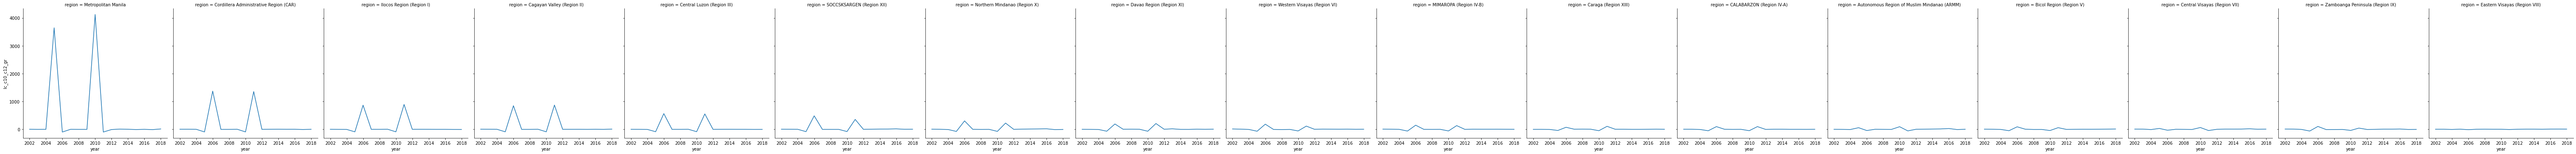

In [120]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c10_c12_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='lc_c10_c12_gr', col='region', kind='line', 
            col_order=top_ave_lc_c10_c12_gr.index)

In [121]:
#  19-year average croplands+vegetation area per region, highest to lowest
top_ave_lc_c12_c14_gr = df_lc.groupby(['region']).mean().sort_values(by='lc_c12_c14_gr', ascending=False)[['zone_code', 'lc_c12_c14_gr']]
top_ave_lc_c12_c14_gr

zone_code  lc_c12_c14_gr
region                                                               
Northern Mindanao (Region X)                        14    1037.435769
Autonomous Region of Muslim Mindanao (ARMM)          1     916.328566
Zamboanga Peninsula (Region IX)                     17     812.418021
Metropolitan Manila                                 13     746.581338
SOCCSKSARGEN (Region XII)                           15     727.330671
Caraga (Region XIII)                                 5     405.014142
Bicol Region (Region V)                              2     321.201283
Cagayan Valley (Region II)                           4     306.324026
MIMAROPA (Region IV-B)                              12     248.732580
Davao Region (Region XI)                             9     215.159118
Western Visayas (Region VI)                         16     207.467984
Eastern Visayas (Region VIII)                       10     122.214496
Ilocos Region (Region I)                            11     102.775568
Central Luzon (Region III)                           6      74.676834
Cordillera Administrative Region (CAR)               8      60.578561
CALABARZON (Region IV-A)                             3      30.200802
Central Visayas (Region VII)                         7      21.307078

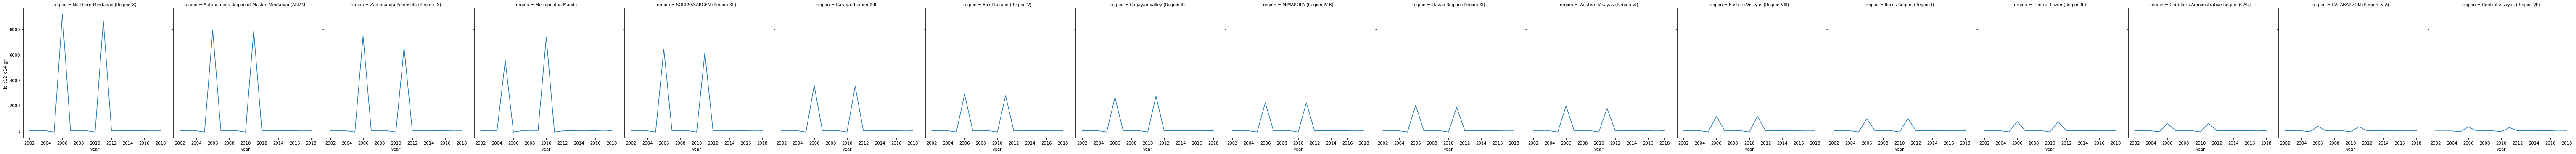

In [122]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c12_c14_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='lc_c12_c14_gr', col='region', kind='line', 
            col_order=top_ave_lc_c12_c14_gr.index)

In [123]:
#  19-year average agri area per region, highest to lowest
top_ave_lc_c10_c12_c14_gr = df_lc.groupby(['region']).mean().sort_values(by='lc_c10_c12_c14_gr', ascending=False)[['zone_code', 'lc_c10_c12_c14_gr']]
top_ave_lc_c10_c12_c14_gr

zone_code  lc_c10_c12_c14_gr
region                                                                   
Metropolitan Manila                                 13         417.987801
SOCCSKSARGEN (Region XII)                           15         367.547742
Northern Mindanao (Region X)                        14         250.004422
Cordillera Administrative Region (CAR)               8         170.046709
Cagayan Valley (Region II)                           4         138.248401
Ilocos Region (Region I)                            11          95.420916
Davao Region (Region XI)                             9          63.970873
Central Luzon (Region III)                           6          60.700494
Zamboanga Peninsula (Region IX)                     17          45.041988
Western Visayas (Region VI)                         16          31.058122
Bicol Region (Region V)                              2          28.579071
Autonomous Region of Muslim Mindanao (ARMM)          1          15.061180
CALABARZON (Region IV-A)                             3          13.143125
MIMAROPA (Region IV-B)                              12          13.012911
Caraga (Region XIII)                                 5          10.141780
Eastern Visayas (Region VIII)                       10           2.096806
Central Visayas (Region VII)                         7           1.853578

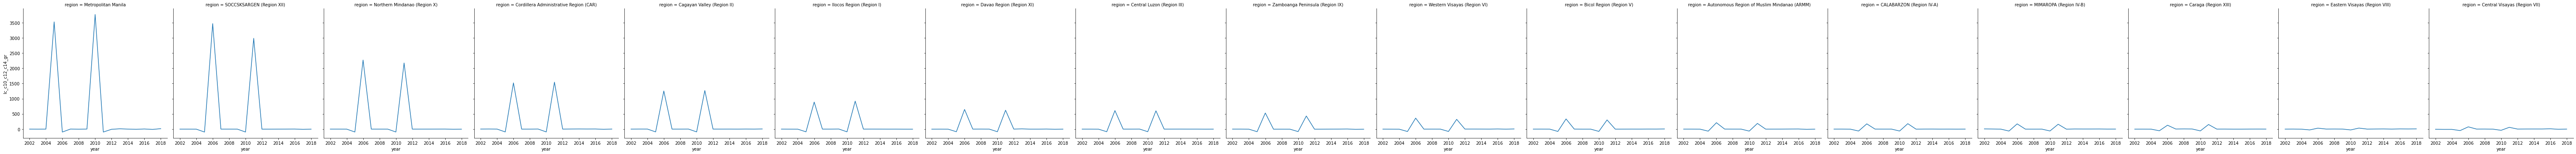

In [124]:
df = df_lc[df_lc['region'].isin(top_ave_lc_c10_c12_c14_gr.index)].set_index('year')
sns.relplot(data=df, x=df.index, y='lc_c10_c12_c14_gr', col='region', kind='line', 
            col_order=top_ave_lc_c10_c12_c14_gr.index)

## GDP, NTL, and Land Cover

In [125]:
df_gdp_ntl = df_gdp.set_index(['region', 'year']).join(df_ntl.set_index(['region', 'year']), rsuffix='_r').reset_index()

In [126]:
df_all = df_gdp_ntl.set_index(['region', 'year']).join(df_lc.set_index(['region', 'year']), rsuffix='_r').reset_index()

In [127]:
df_all['year_int'] = pd.DatetimeIndex(df_all['year']).year

In [128]:
df_all.to_excel('data_for_regression_17Apr.xlsx', index=False)

### GDP and NTL

#### Sample: 2000-2008

In [129]:
df = df_all[df_all['year'] < '2009-01-01']

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp'>

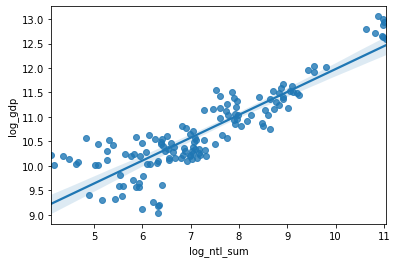

In [130]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp_agr'>

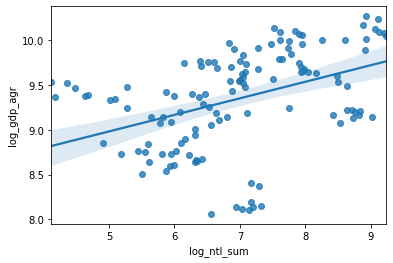

In [131]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp_agr')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp_ind'>

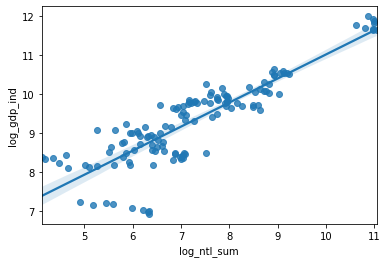

In [132]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp_ind')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp_svc'>

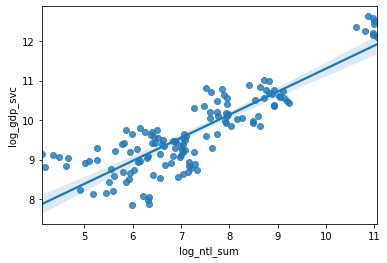

In [133]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp_svc')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp_non_agr'>

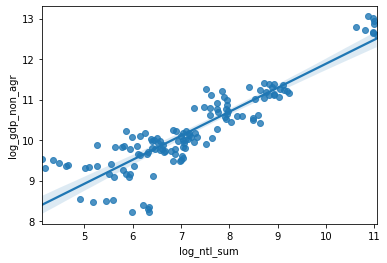

In [134]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp_non_agr')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdppc'>

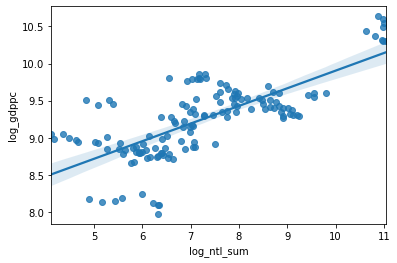

In [135]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdppc')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_gr'>

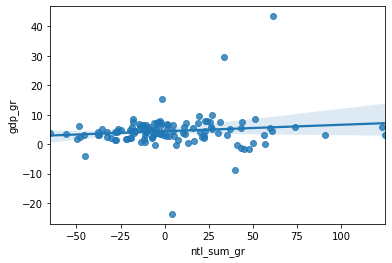

In [136]:
sns.regplot(data=df, x='ntl_sum_gr', y='gdp_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_agr_gr'>

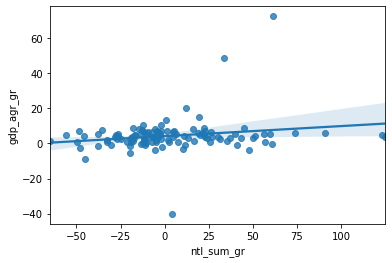

In [137]:
sns.regplot(data=df, x='ntl_sum_gr', y='gdp_agr_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_ind_gr'>

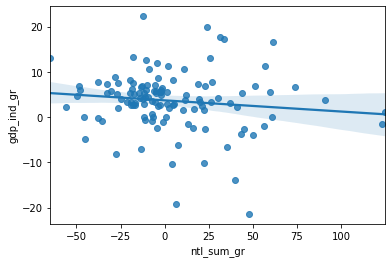

In [138]:
sns.regplot(data=df, x='ntl_sum_gr', y='gdp_ind_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_svc_gr'>

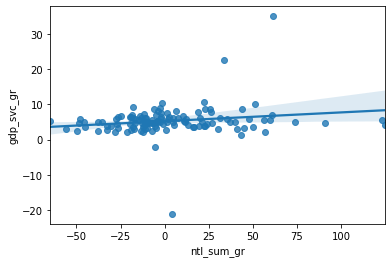

In [139]:
sns.regplot(data=df, x='ntl_sum_gr', y='gdp_svc_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_non_agr_gr'>

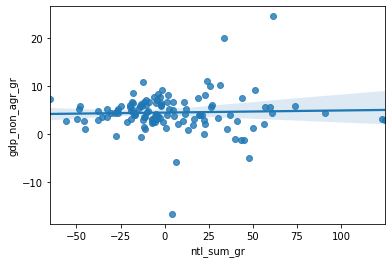

In [140]:
sns.regplot(data=df, x='ntl_sum_gr', y='gdp_non_agr_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdppc_gr'>

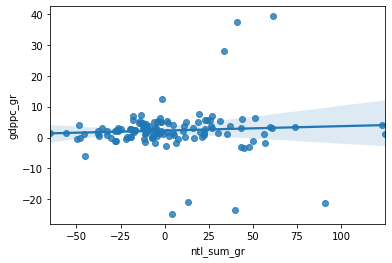

In [141]:
sns.regplot(data=df, x='ntl_sum_gr', y='gdppc_gr')

<AxesSubplot:>

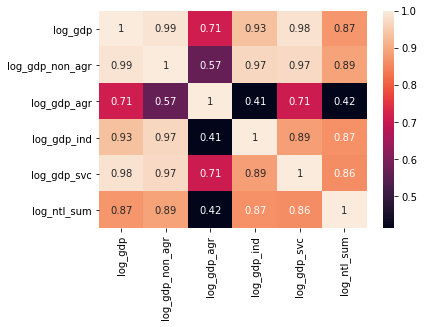

In [142]:
df1 = df[['log_gdp', 'log_gdp_non_agr', 'log_gdp_agr', 'log_gdp_ind', 'log_gdp_svc', 'log_ntl_sum']]
sns.heatmap(data=df1.corr(), annot=True)

<AxesSubplot:>

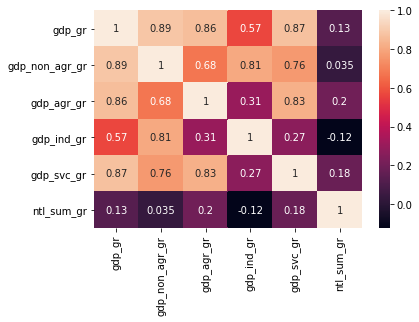

In [143]:
df1 = df[['gdp_gr', 'gdp_non_agr_gr', 'gdp_agr_gr', 'gdp_ind_gr', 'gdp_svc_gr', 'ntl_sum_gr']]
sns.heatmap(data=df1.corr(), annot=True)

#### Sample: 2009-2018

In [144]:
df = df_all[df_all['year'] >= '2009-01-01']

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp'>

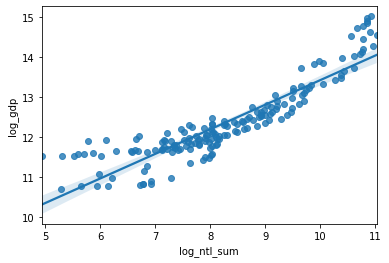

In [145]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp_agr'>

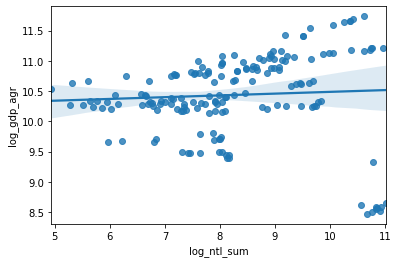

In [146]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp_agr')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp_ind'>

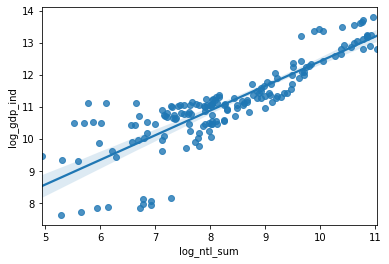

In [147]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp_ind')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp_svc'>

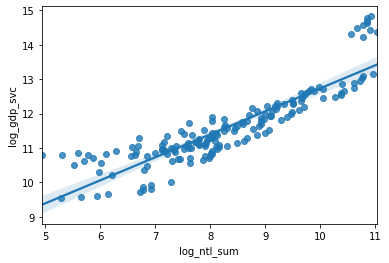

In [148]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp_svc')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp_non_agr'>

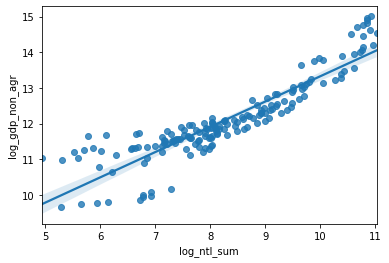

In [149]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdp_non_agr')

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdppc'>

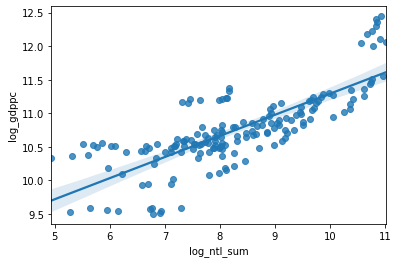

In [150]:
sns.regplot(data=df, x='log_ntl_sum', y='log_gdppc')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_gr'>

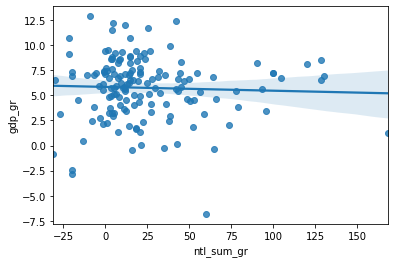

In [151]:
dfg = df_all[df_all['year'] > '2009-01-01']
sns.regplot(data=dfg, x='ntl_sum_gr', y='gdp_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_agr_gr'>

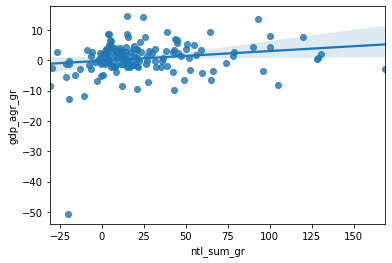

In [152]:
sns.regplot(data=dfg, x='ntl_sum_gr', y='gdp_agr_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_ind_gr'>

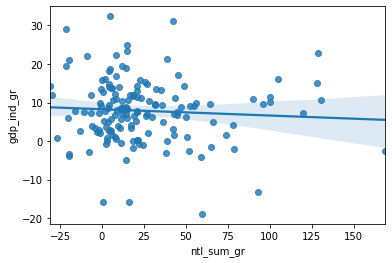

In [153]:
sns.regplot(data=dfg, x='ntl_sum_gr', y='gdp_ind_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_svc_gr'>

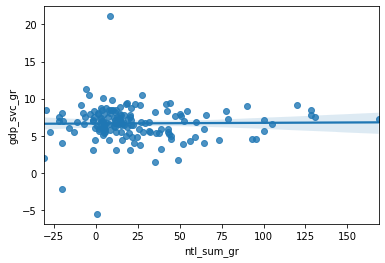

In [154]:
sns.regplot(data=dfg, x='ntl_sum_gr', y='gdp_svc_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdp_non_agr_gr'>

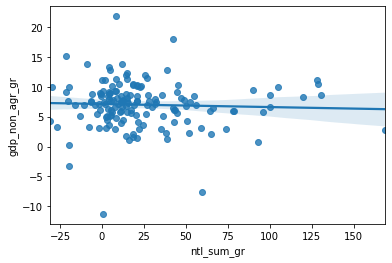

In [155]:
sns.regplot(data=dfg, x='ntl_sum_gr', y='gdp_non_agr_gr')

<AxesSubplot:xlabel='ntl_sum_gr', ylabel='gdppc_gr'>

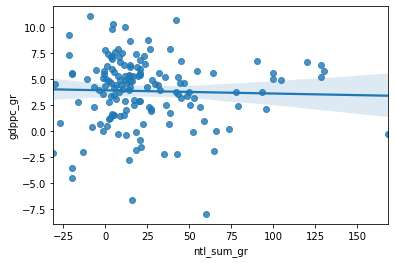

In [156]:
sns.regplot(data=dfg, x='ntl_sum_gr', y='gdppc_gr')

<AxesSubplot:>

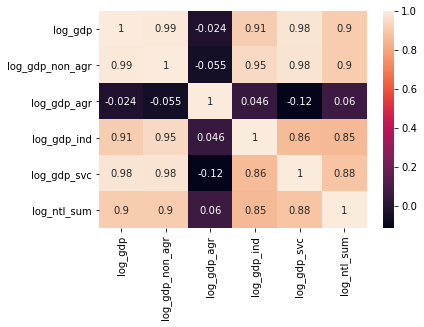

In [157]:
df1 = df[['log_gdp', 'log_gdp_non_agr', 'log_gdp_agr', 'log_gdp_ind', 'log_gdp_svc', 'log_ntl_sum']]
sns.heatmap(data=df1.corr(), annot=True)

<AxesSubplot:>

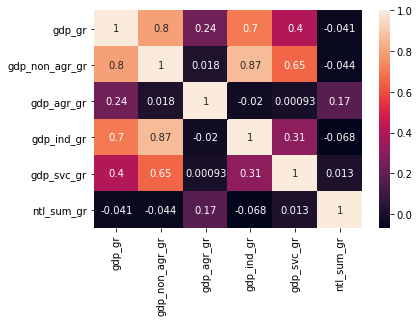

In [158]:
df1 = dfg[['gdp_gr', 'gdp_non_agr_gr', 'gdp_agr_gr', 'gdp_ind_gr', 'gdp_svc_gr', 'ntl_sum_gr']]
sns.heatmap(data=df1.corr(), annot=True)

#### 2000-08 vs 2009-18

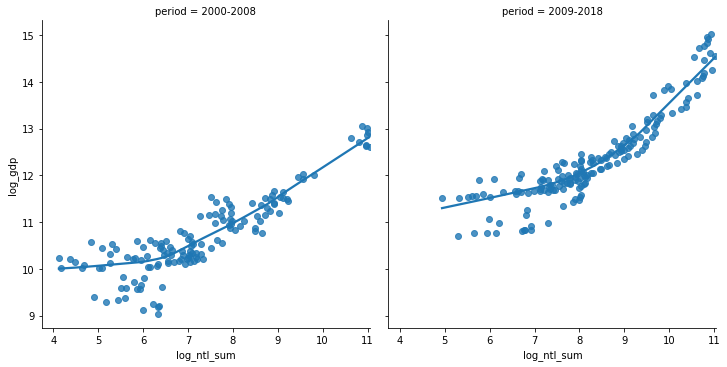

In [159]:
sns.lmplot(data=df_all, x='log_ntl_sum', y='log_gdp', col='period', lowess=True)

<AxesSubplot:xlabel='log_ntl_sum', ylabel='log_gdp'>

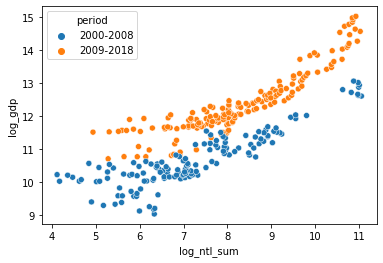

In [160]:
sns.scatterplot(data=df_all, x='log_ntl_sum', y='log_gdp', hue='period')

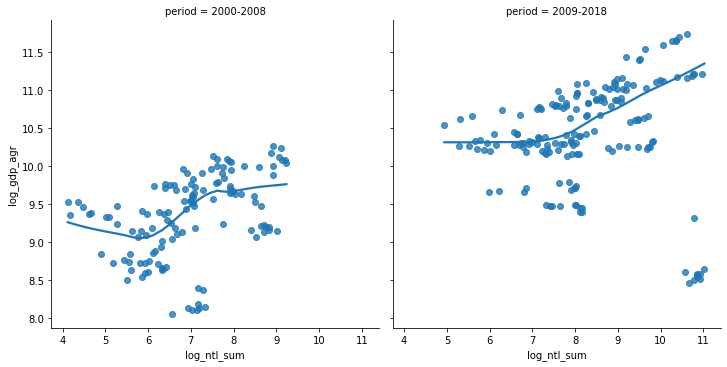

In [161]:
sns.lmplot(data=df_all, x='log_ntl_sum', y='log_gdp_agr', col='period', lowess=True)

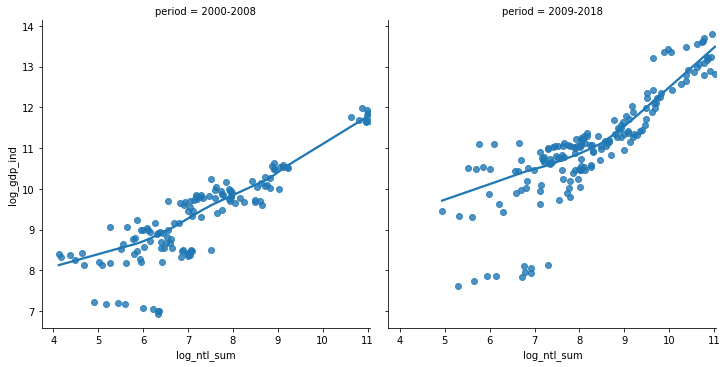

In [162]:
sns.lmplot(data=df_all, x='log_ntl_sum', y='log_gdp_ind', col='period', lowess=True)

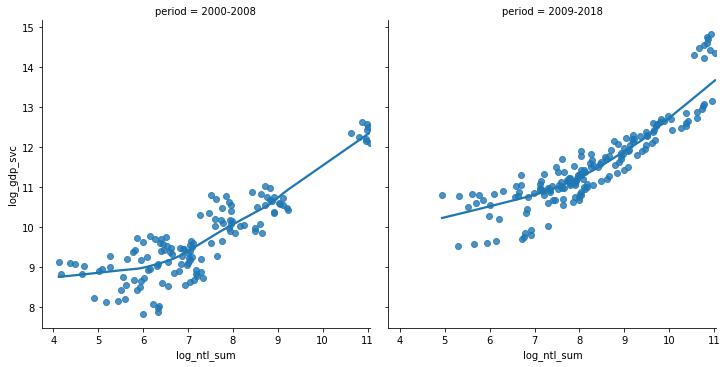

In [163]:
sns.lmplot(data=df_all, x='log_ntl_sum', y='log_gdp_svc', col='period', lowess=True)

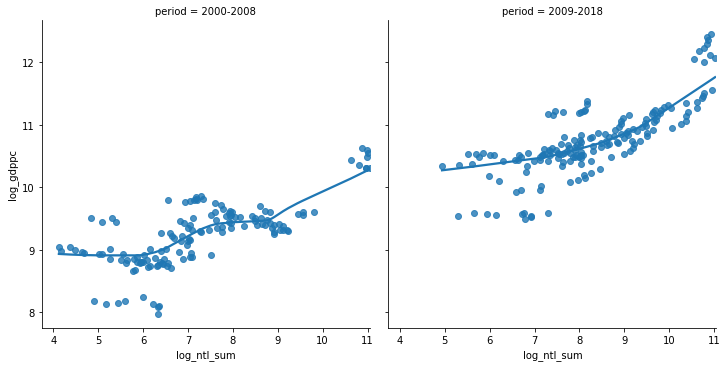

In [164]:
sns.lmplot(data=df_all, x='log_ntl_sum', y='log_gdppc', col='period', lowess=True)

### Agricultural GDP and land cover

#### Sample: 2000-2008

In [165]:
df = df_all[df_all['year'] < '2009-01-01']

<AxesSubplot:xlabel='log_lc_c10', ylabel='log_gdp_agr'>

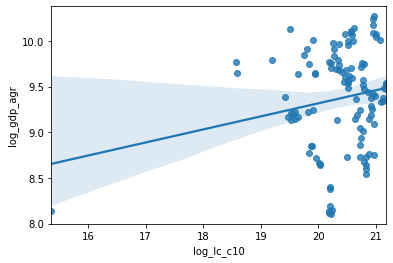

In [166]:
sns.regplot(data=df, x='log_lc_c10', y='log_gdp_agr')

<AxesSubplot:xlabel='log_lc_c12', ylabel='log_gdp_agr'>

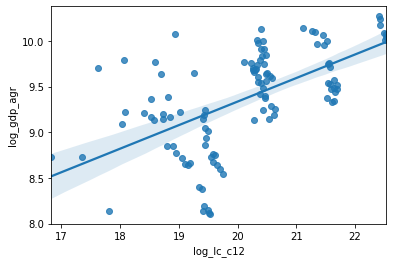

In [167]:
sns.regplot(data=df, x='log_lc_c12', y='log_gdp_agr')

C:\Users\Jesson Pagaduan\Anaconda3\lib\site-packages\numpy\core\function_base.py:144: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Jesson Pagaduan\Anaconda3\lib\site-packages\numpy\core\function_base.py:154: RuntimeWarning:

invalid value encountered in add



<AxesSubplot:xlabel='log_lc_c14', ylabel='log_gdp_agr'>

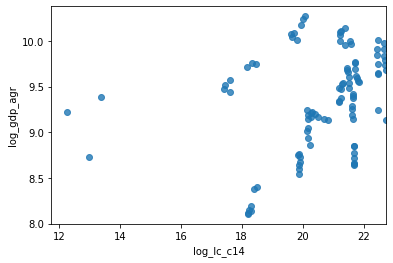

In [168]:
sns.regplot(data=df, x='log_lc_c14', y='log_gdp_agr')

<AxesSubplot:xlabel='log_lc_c10_c12', ylabel='log_gdp_agr'>

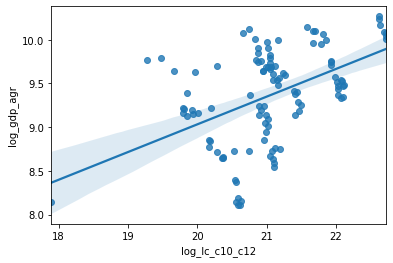

In [169]:
sns.regplot(data=df, x='log_lc_c10_c12', y='log_gdp_agr')

<AxesSubplot:xlabel='log_lc_c12_c14', ylabel='log_gdp_agr'>

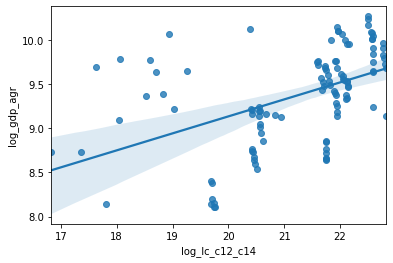

In [170]:
sns.regplot(data=df, x='log_lc_c12_c14', y='log_gdp_agr')

<AxesSubplot:xlabel='log_lc_c10_c12_c14', ylabel='log_gdp_agr'>

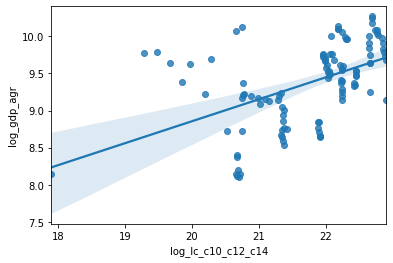

In [171]:
sns.regplot(data=df, x='log_lc_c10_c12_c14', y='log_gdp_agr')

In [172]:
df1 = df[['log_gdp_agr', 'log_lc_c10', 'log_lc_c12', 'log_lc_c14', 'log_lc_c10_c12', 
          'log_lc_c12_c14', 'log_lc_c10_c12_c14']]

<AxesSubplot:>

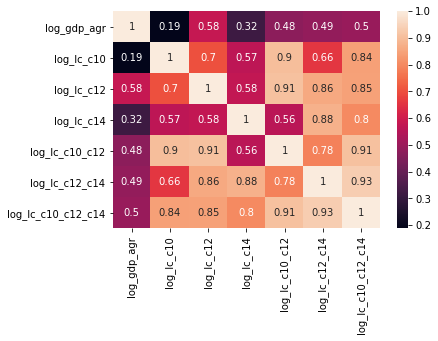

In [173]:
sns.heatmap(data=df1.corr(), annot=True)

#### Sample: 2009-2018

In [174]:
df = df_all[df_all['year'] >= '2009-01-01']

<AxesSubplot:xlabel='log_lc_c10', ylabel='log_gdp_agr'>

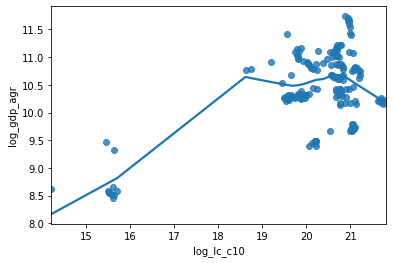

In [175]:
sns.regplot(data=df, x='log_lc_c10', y='log_gdp_agr', lowess=True)

<AxesSubplot:xlabel='log_lc_c12', ylabel='log_gdp_agr'>

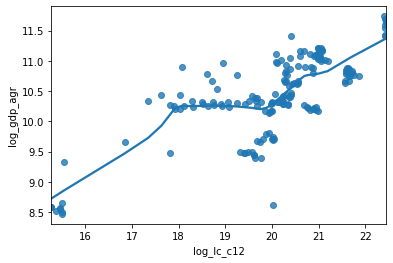

In [176]:
sns.regplot(data=df, x='log_lc_c12', y='log_gdp_agr', lowess=True)

C:\Users\Jesson Pagaduan\Anaconda3\lib\site-packages\numpy\core\function_base.py:144: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Jesson Pagaduan\Anaconda3\lib\site-packages\numpy\core\function_base.py:154: RuntimeWarning:

invalid value encountered in add



<AxesSubplot:xlabel='log_lc_c14', ylabel='log_gdp_agr'>

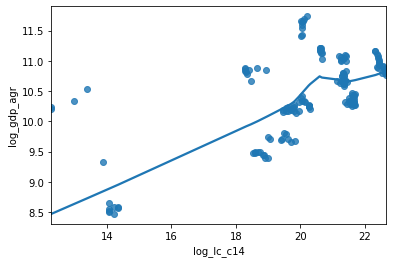

In [177]:
sns.regplot(data=df, x='log_lc_c14', y='log_gdp_agr', lowess=True)

<AxesSubplot:xlabel='log_lc_c10_c12', ylabel='log_gdp_agr'>

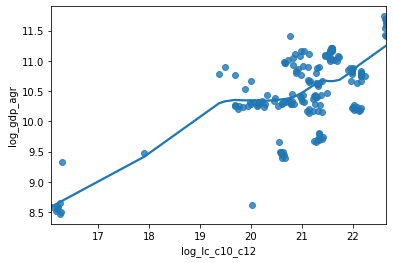

In [178]:
sns.regplot(data=df, x='log_lc_c10_c12', y='log_gdp_agr', lowess=True)

<AxesSubplot:xlabel='log_lc_c12_c14', ylabel='log_gdp_agr'>

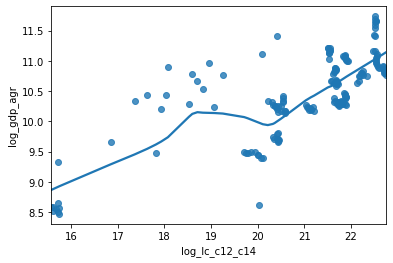

In [179]:
sns.regplot(data=df, x='log_lc_c12_c14', y='log_gdp_agr', lowess=True)

<AxesSubplot:xlabel='log_lc_c10_c12_c14', ylabel='log_gdp_agr'>

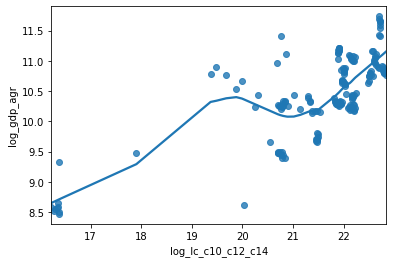

In [180]:
sns.regplot(data=df, x='log_lc_c10_c12_c14', y='log_gdp_agr', lowess=True)

In [181]:
df1 = df[['log_gdp_agr', 'log_lc_c10', 'log_lc_c12', 'log_lc_c14', 'log_lc_c10_c12', 
          'log_lc_c12_c14', 'log_lc_c10_c12_c14']]

<AxesSubplot:>

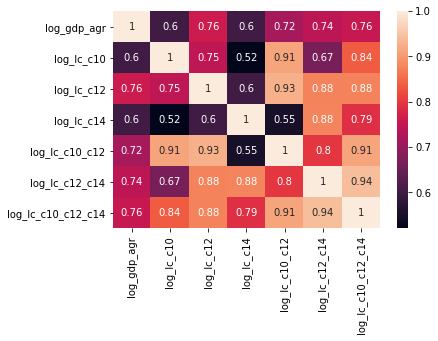

In [182]:
sns.heatmap(data=df1.corr(), annot=True)

In [183]:
show(df_all)

PandasGUI WARNING — pandasgui.utility — In df_all, renamed duplicate columns: ['zone_code_r']


In [184]:
df_all.to_excel('data_for_regression_19Apr.xlsx', index=False)

In [185]:
show(df_all)